# Señales de sonido de electrocardiogramas 
Las señales de electrocardiogramas (ECG) tienen un papel fundamental en la salud cardiológica de las personas, esta se basa en registrar la actividad eléctrica del corazón conociendo por medio de su señal el mismo. 
En la rama de la ingeniería eléctrica el estudio de las señales es fundamental poder visualizar el comportamiento de las mismas para determinar anomalías, tal como se puede presentar en un electrocardiograma. Para mejorar este procedimiento, es importante generar códigos que puedan hacer más eficaz y eficiente el estudio, logrando que cualquier persona pueda hacer uso de estas herramientas y se vean beneficiados. 
Las señales están presentes en muchos aspectos de la vida cotidiana y es parte de muchas ramas de estudio, por lo cual vamos a analizar 15 señales de sonido de electrocardiogramas en búsqueda de una mayor comprensión de las mismas.
## Etapa 1 
Para esta etapa se han seleccionado de forma aleatoria 15 señales de electrocardiogramas para ser graficadas, de estas se escogió una señal la cual se graficó para ver su señal en 1 y 3 latidos con mayor detalle en la que se determinó su frecuencia según los pulsos visualizados.

In [1]:
# Importación de las librerrias de Phyton
import numpy as np
import random as rd
import wave
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import butter, lfilter, filtfilt #Para filtración de datos
from statistics import stdev
sys.path.insert(1, r'./../functions') # Añadir phytonpath

# Comandos para crear una alta resolución en las figuras 
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 16 # Tamaño de las etiquetas de las figuras 
plt.rcParams['axes.titlesize'] = 18 # Tamaño de los títulos de las figuras 
plt.rcParams['font.size'] = 14 # Tamaño de los números de las figuras
plt.rcParams['lines.linewidth'] = 1.4 # Ancho de línea por graficar 

In [2]:
# Función que extrae los números de la grabación de canales, frecuencia de muestreo, tiempo y señal 
# variable es el camino y nombre del archivo .wav 
def ecg(variable):
    record = wave.open(variable, 'r') # Cargar los datos

    # Obtener los números de canales, frecuencias de muestreo, etc.
    numChannels = record.getnchannels() # Número de canales
    numFrames = record.getnframes() # Número de fragmentos
    sampleRate = record.getframerate() # Frecuencia de muestreo
    sampleWidth = record.getsampwidth()
    
    # Obtener los datos de onda 
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Obtener la ventana de tiempo 
    timeECG = np.linspace(0, len(waveData)/sampleRate, num=len(waveData))

    return timeECG, waveData


* Audios de latidos escogidos a graficar

In [3]:
# Audios escogidos para graficar
nice = ["a0001","a0003", "a0010", "a0013", "a0024", "a0049", "a0086", "a0104", "a0128", "a0143", "a0151", "a0158", "a0164", "a0182", "a0200"]

* Señales de sonido de 15 audios de electrocardiogramas

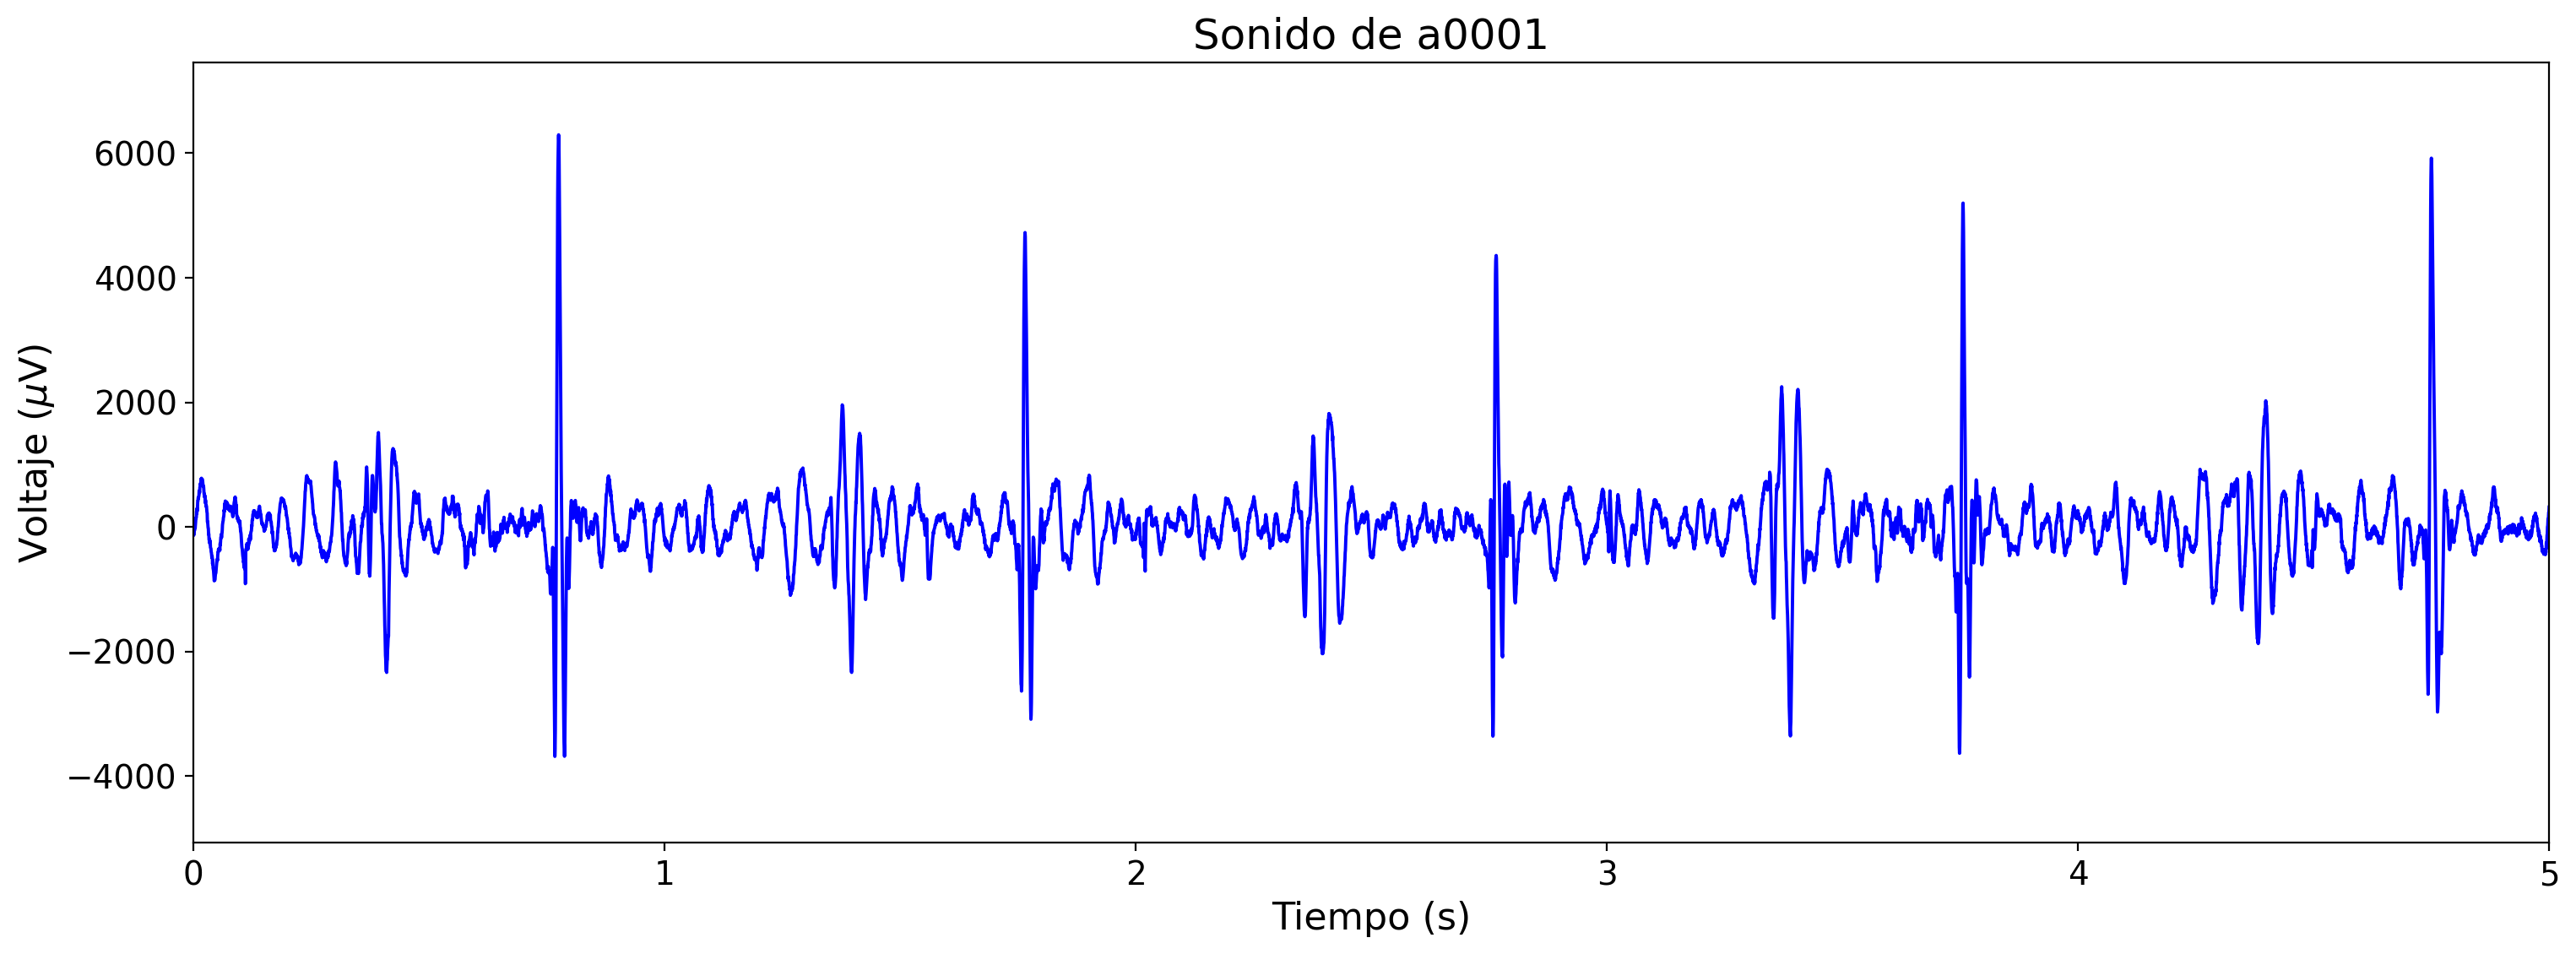

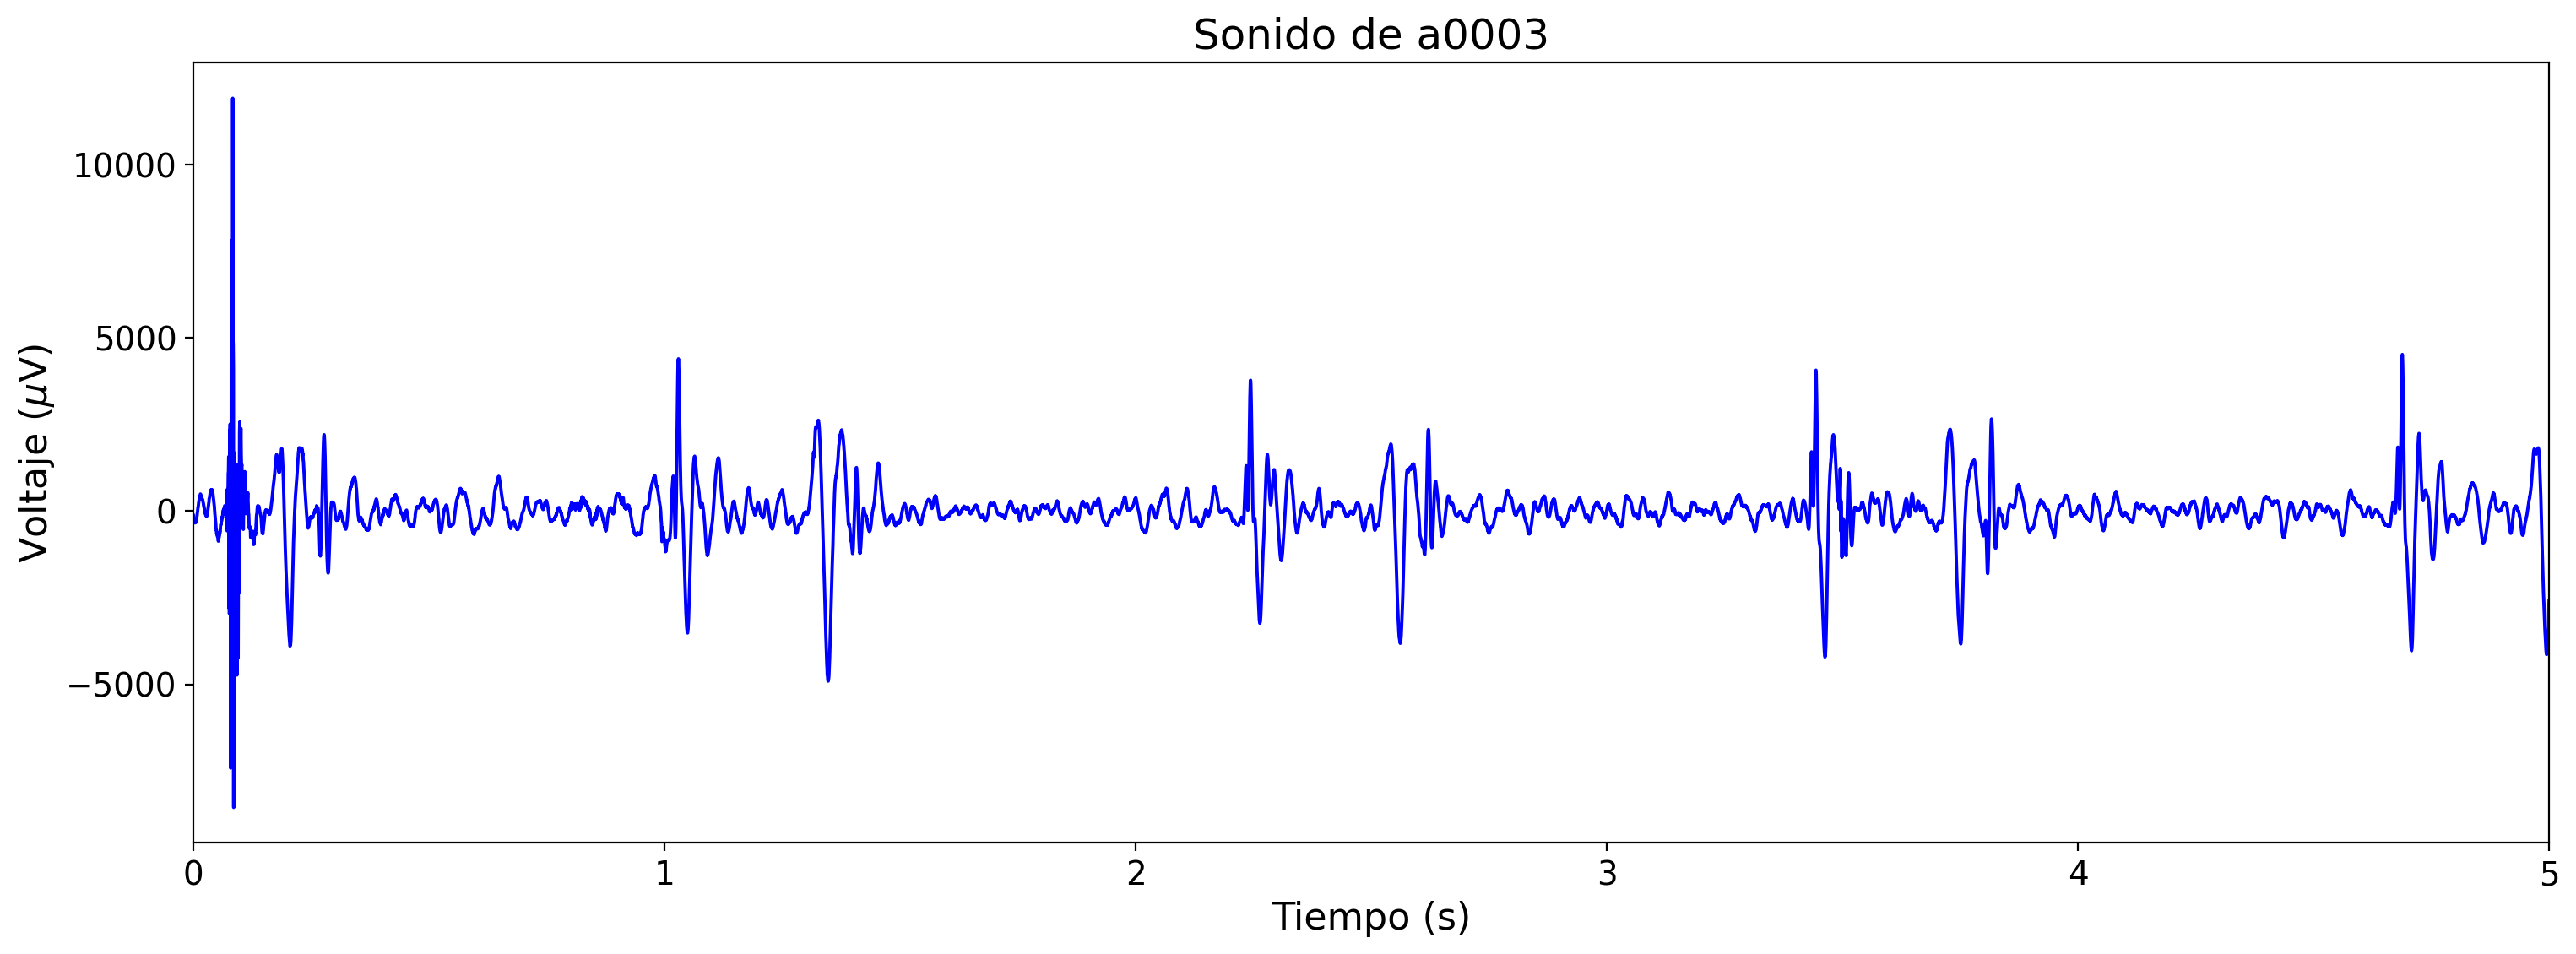

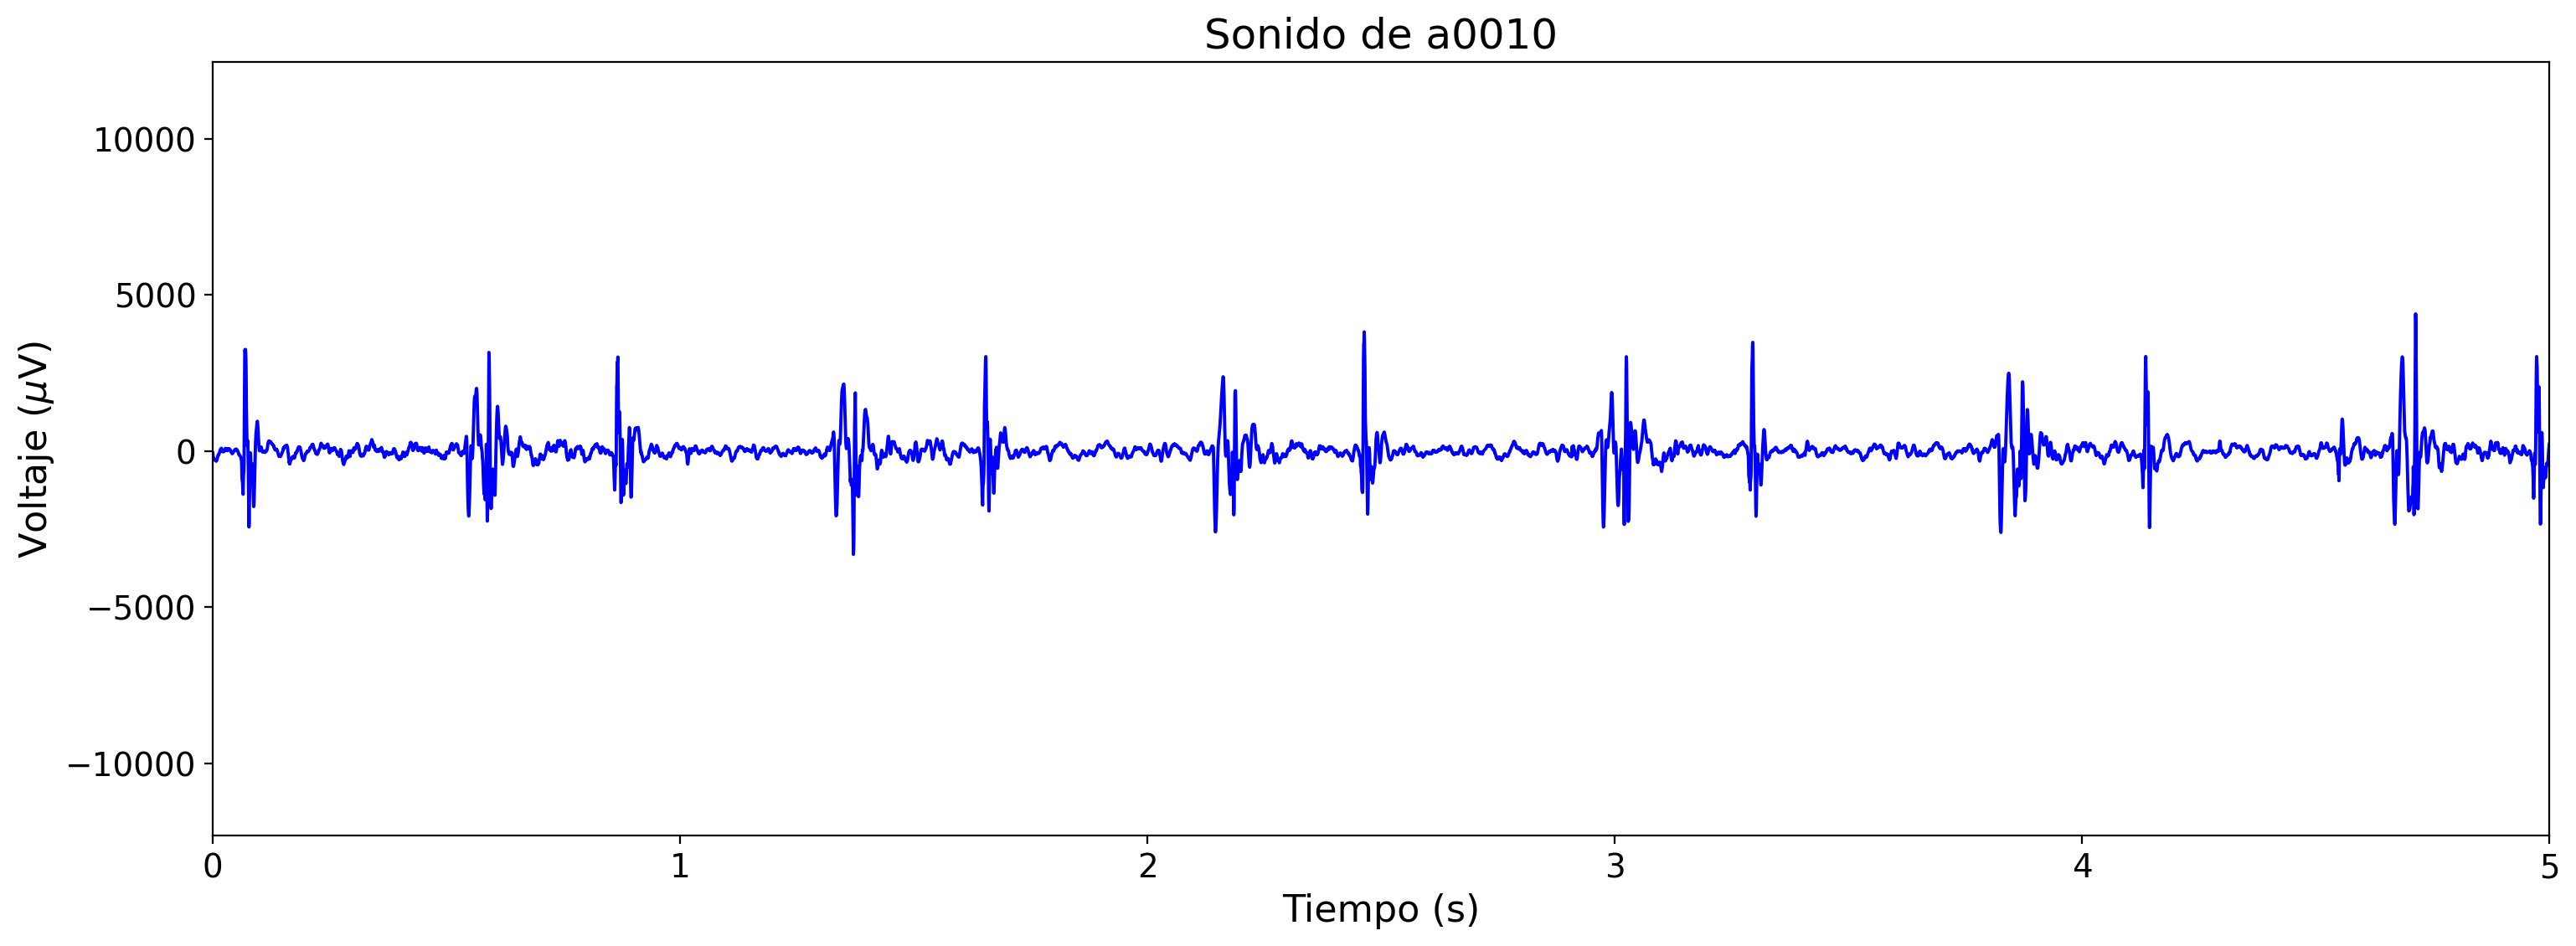

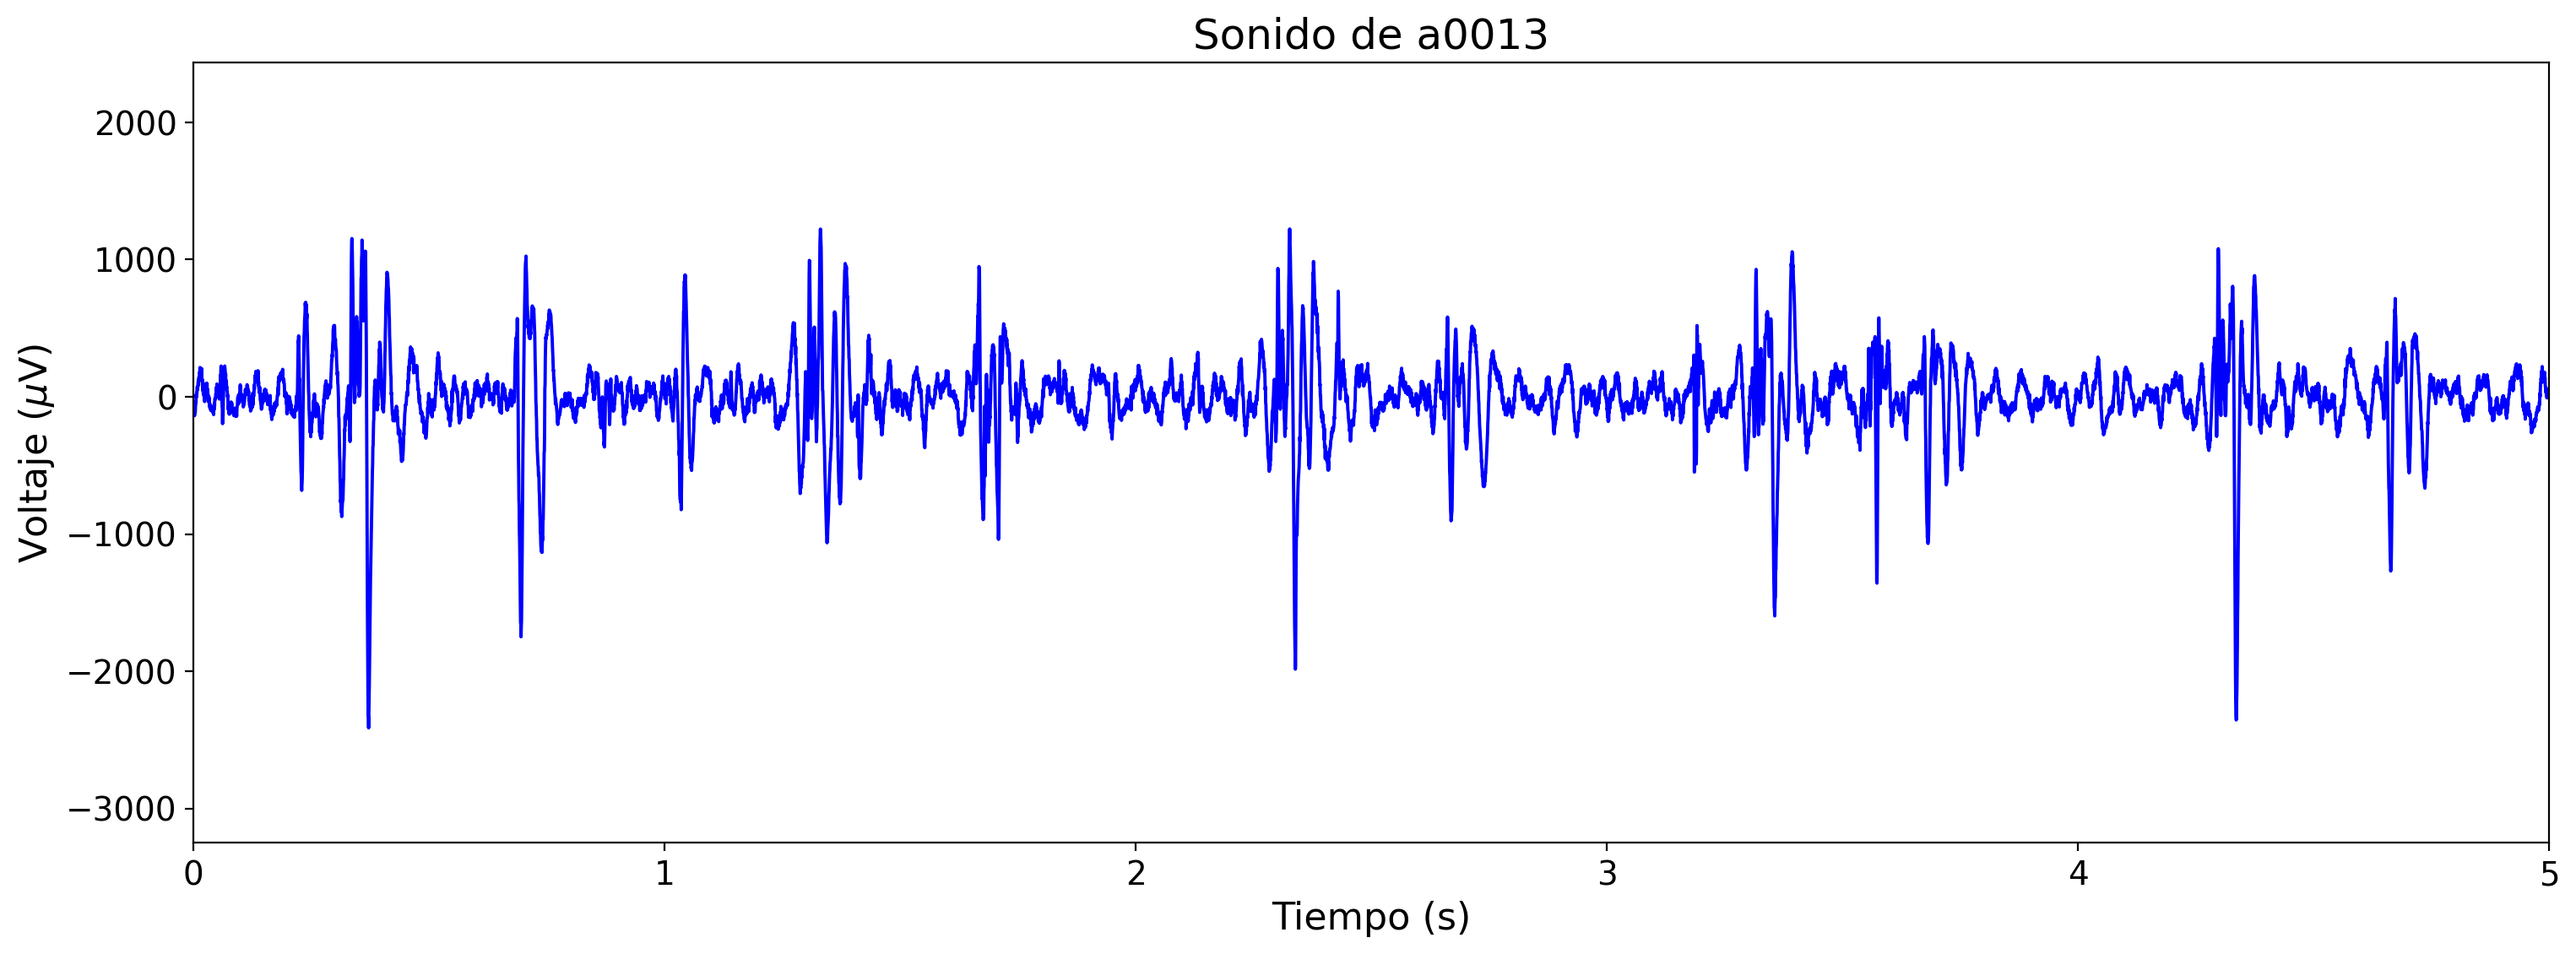

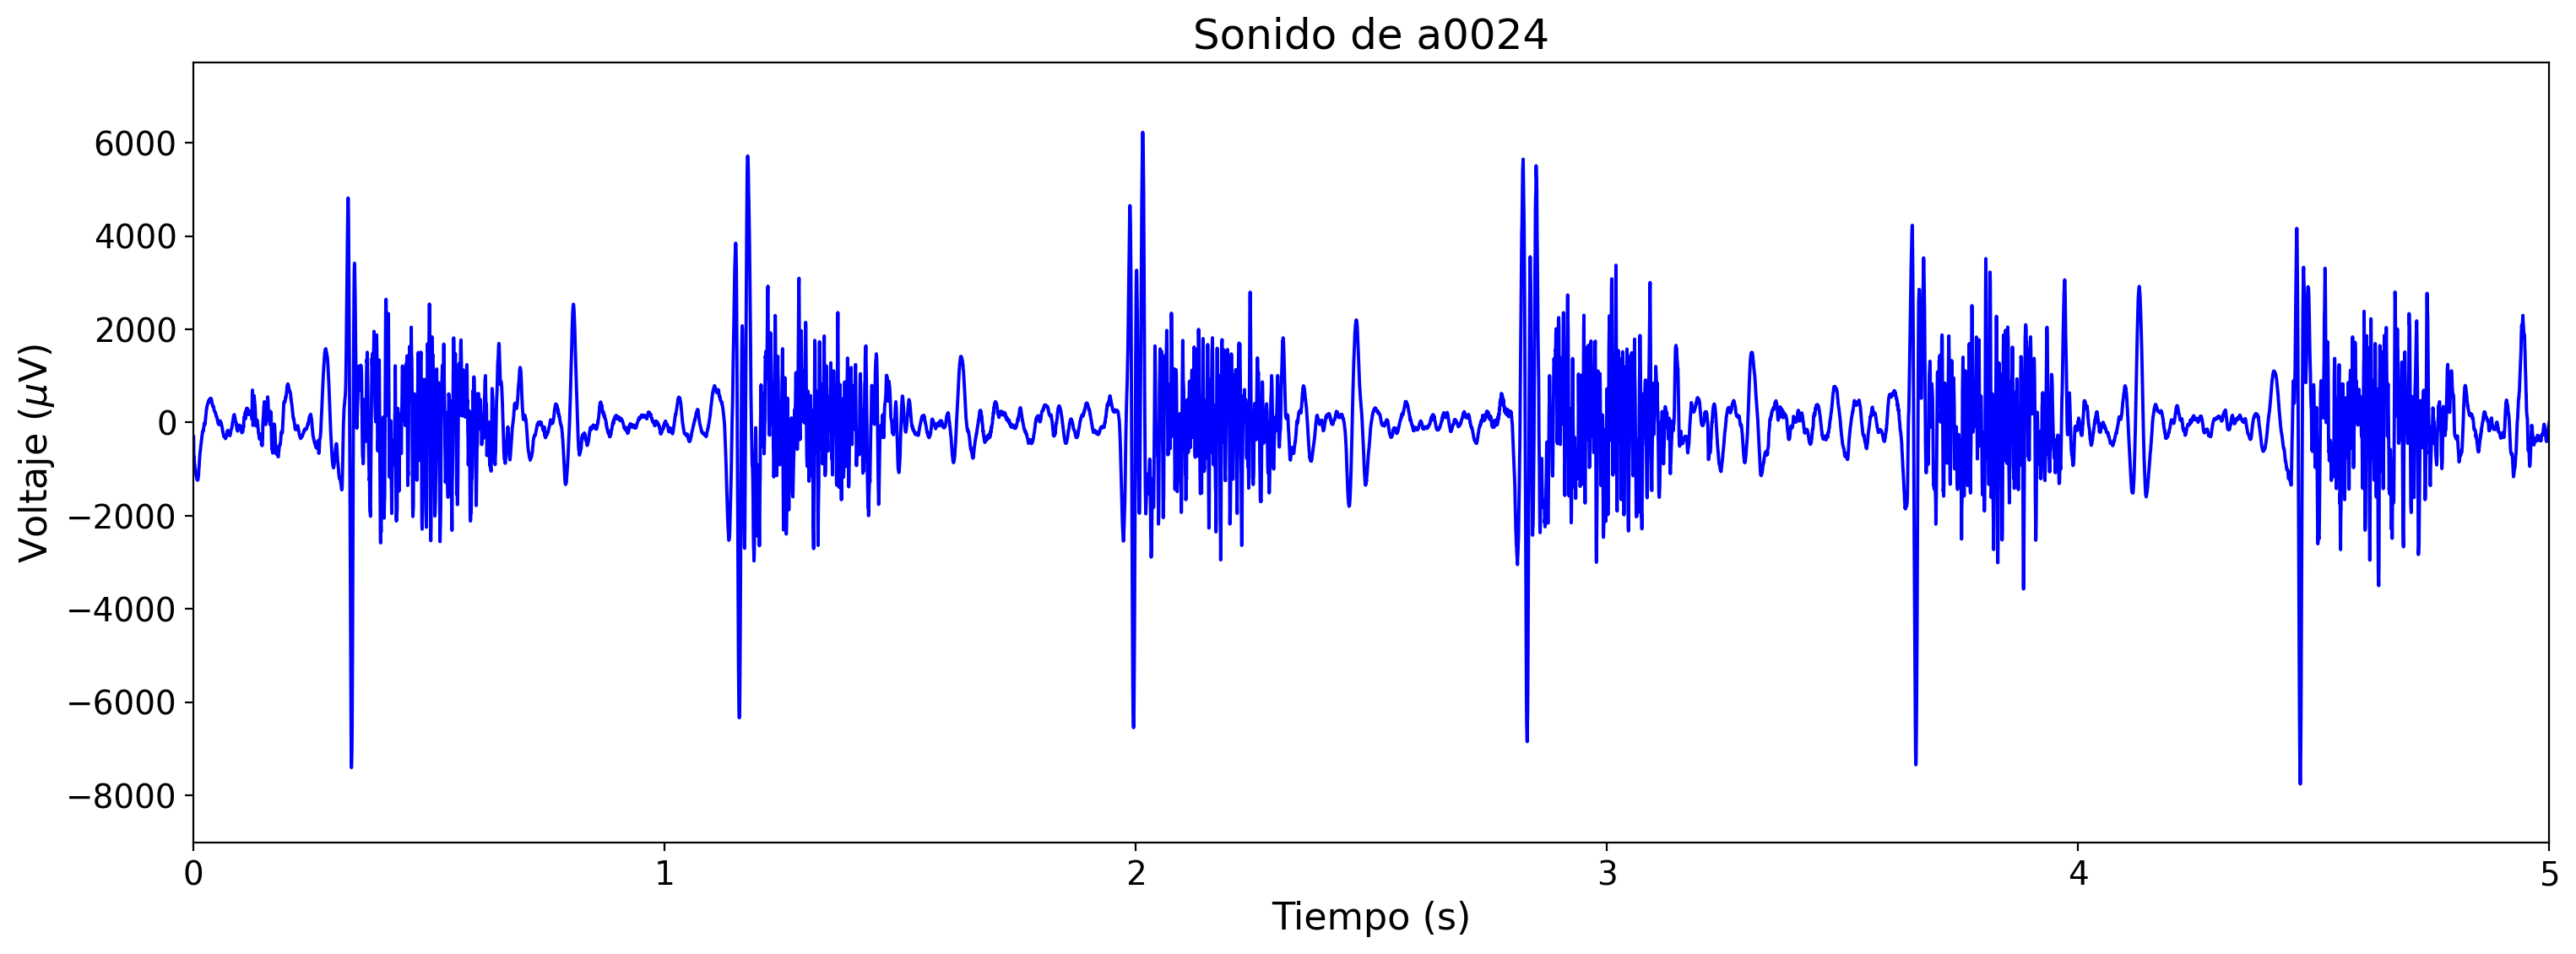

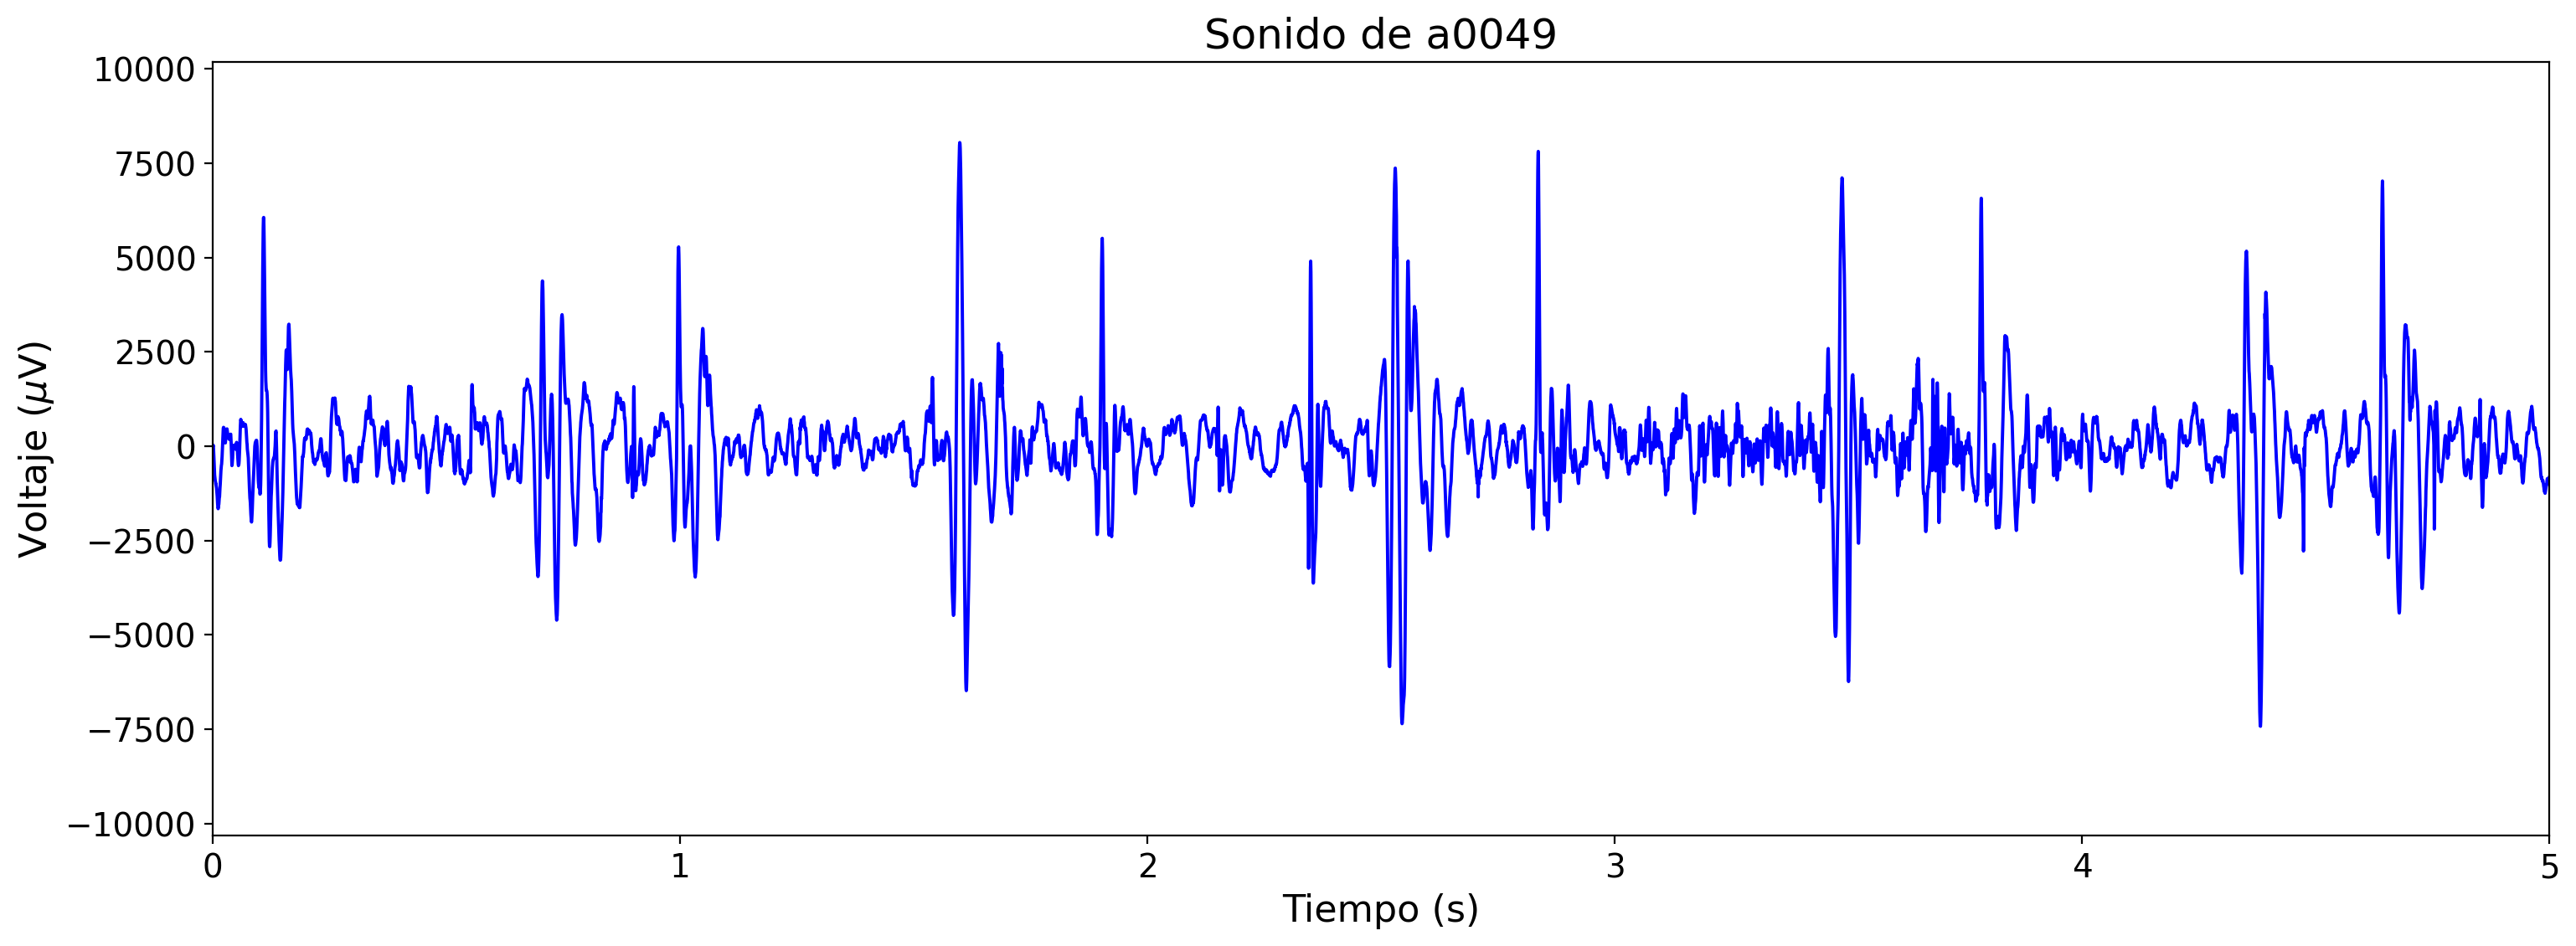

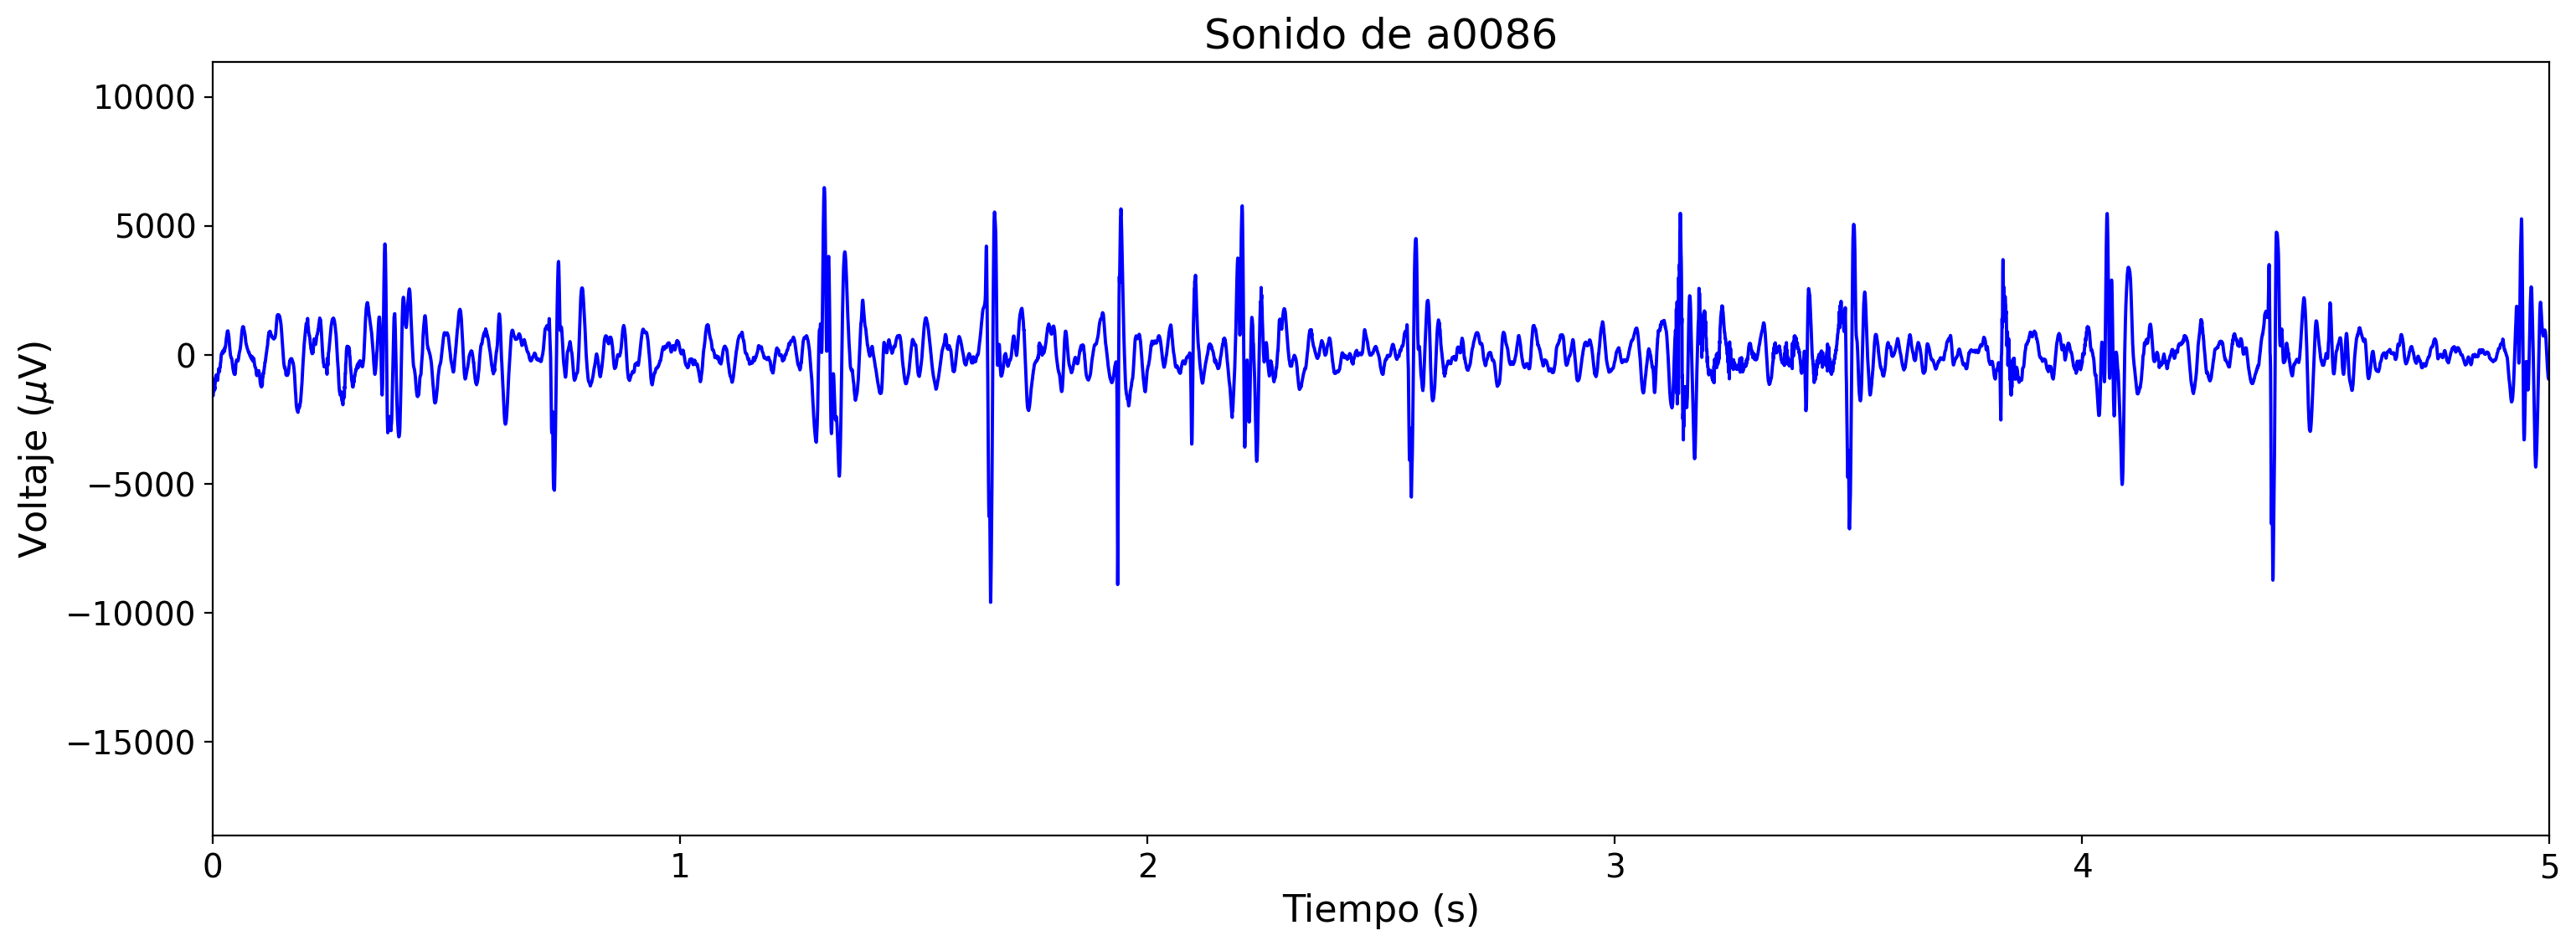

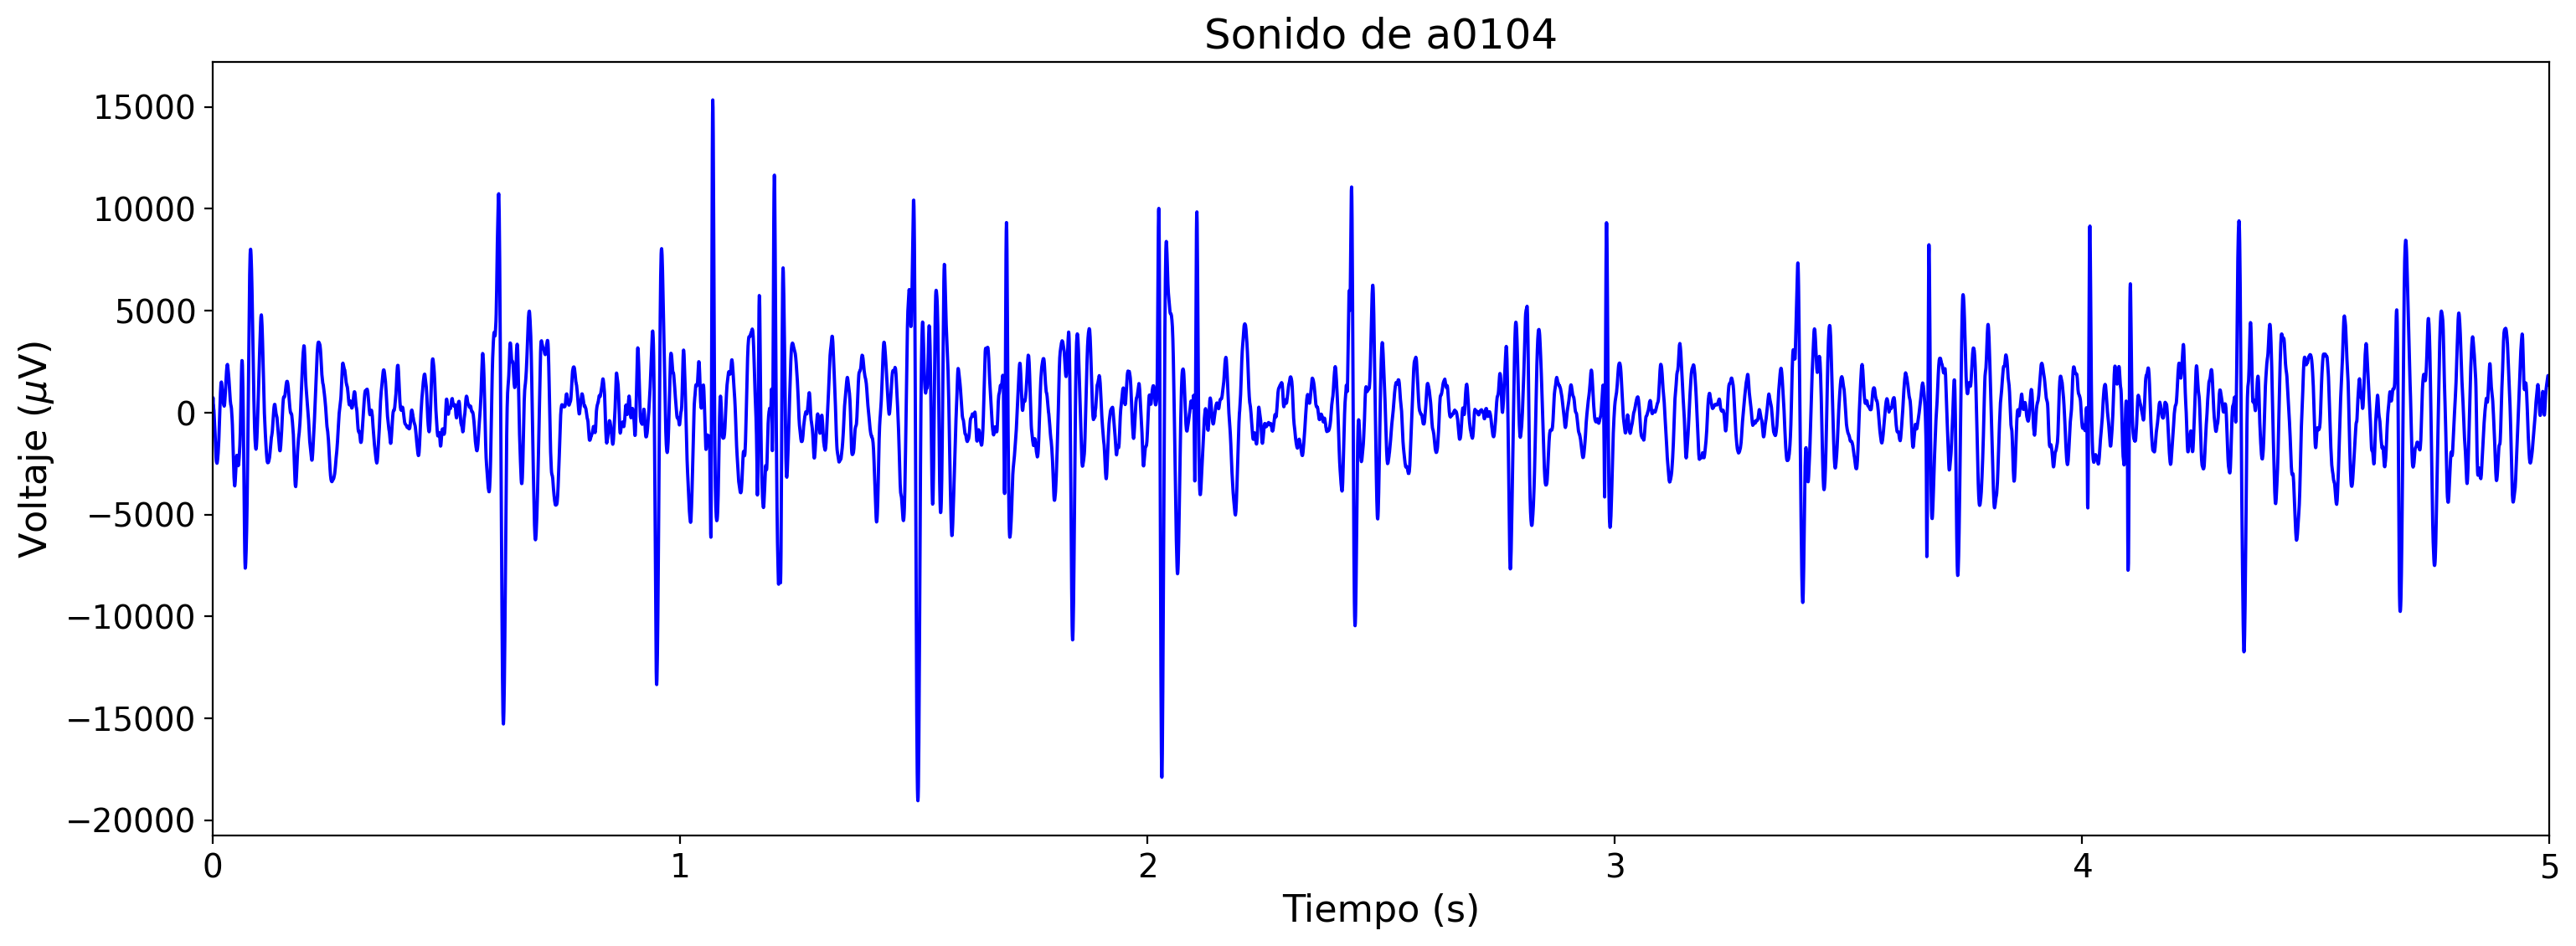

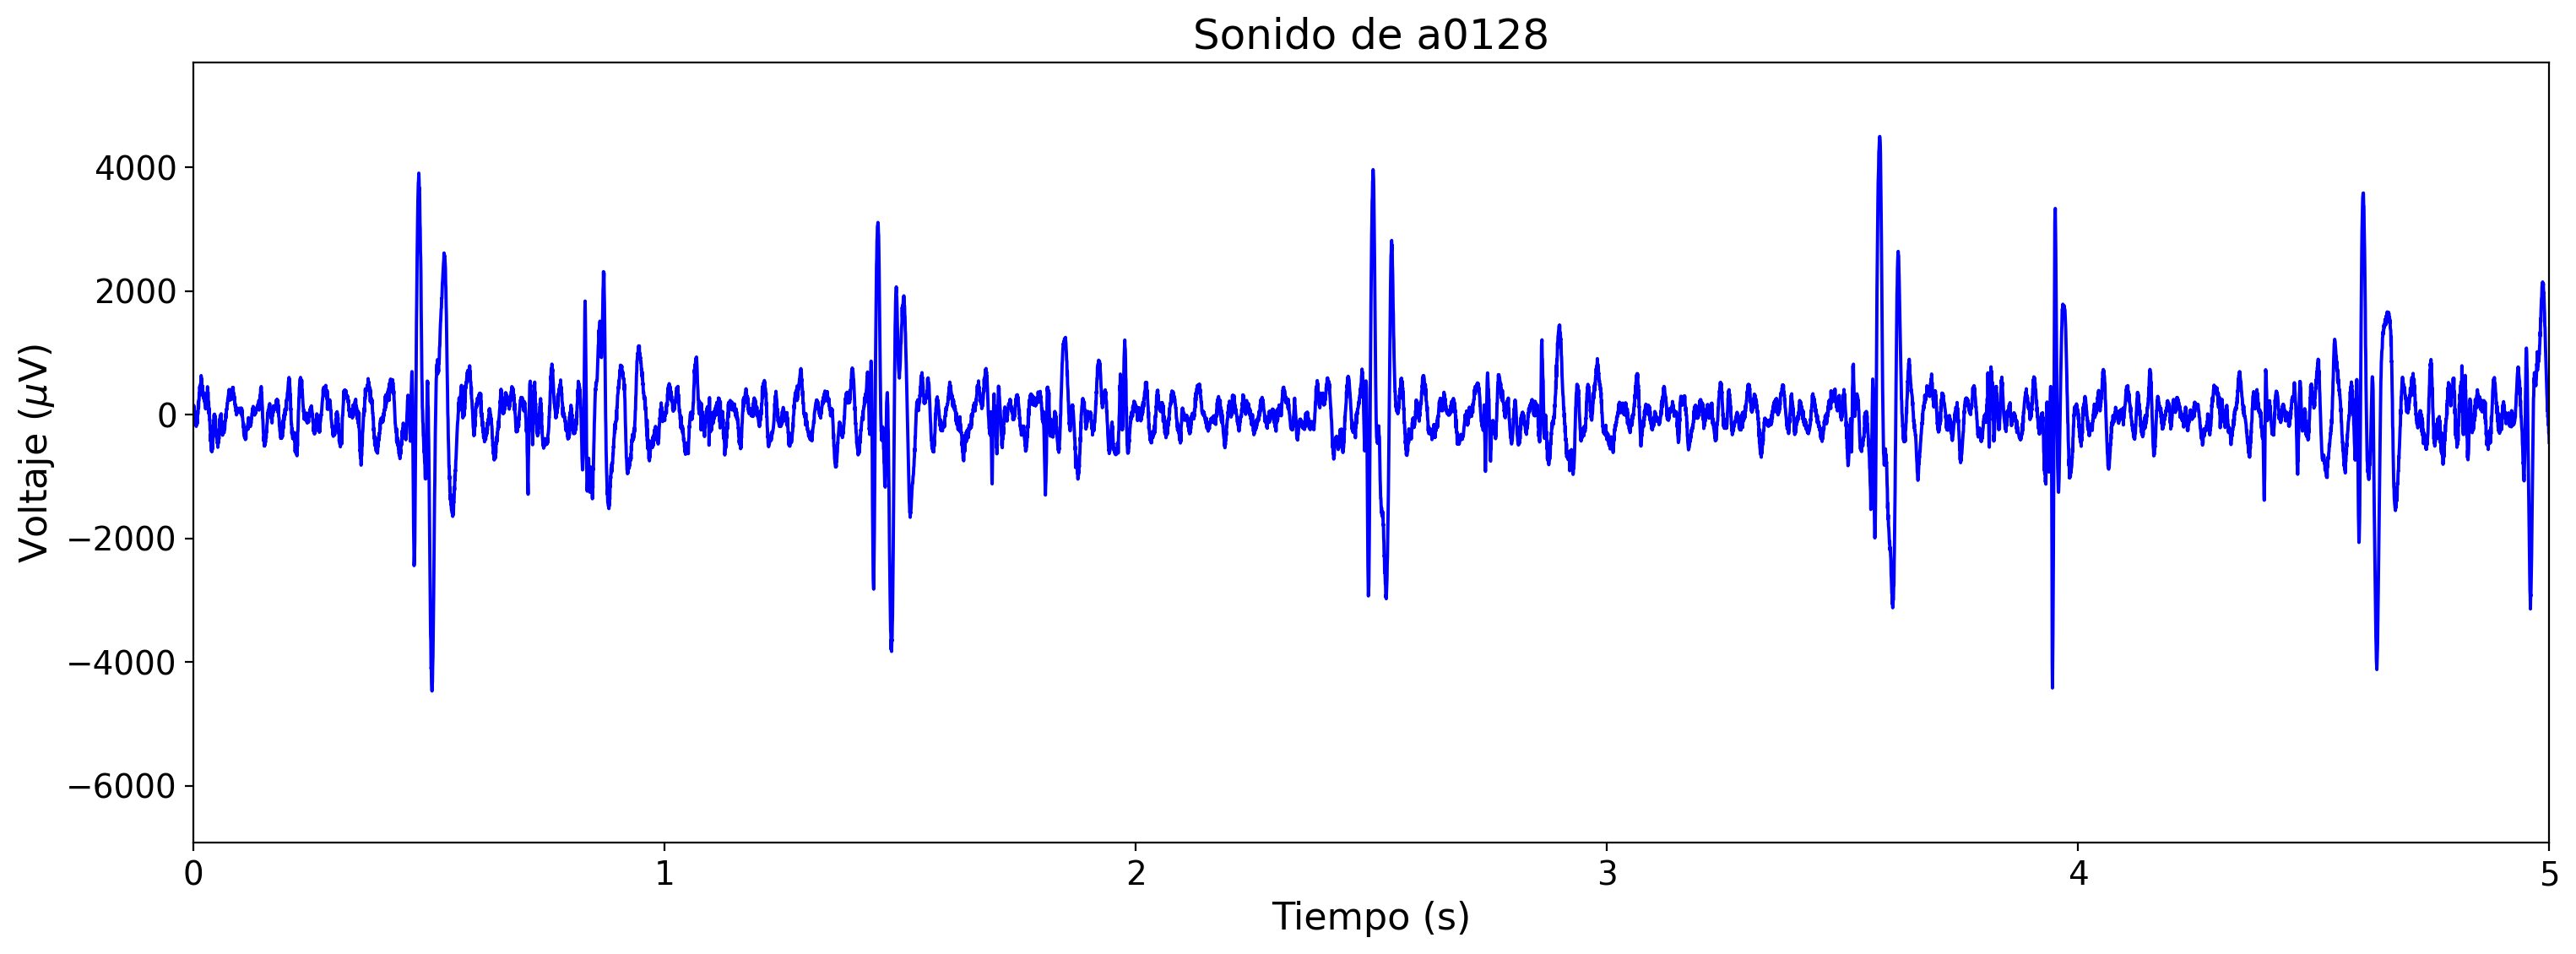

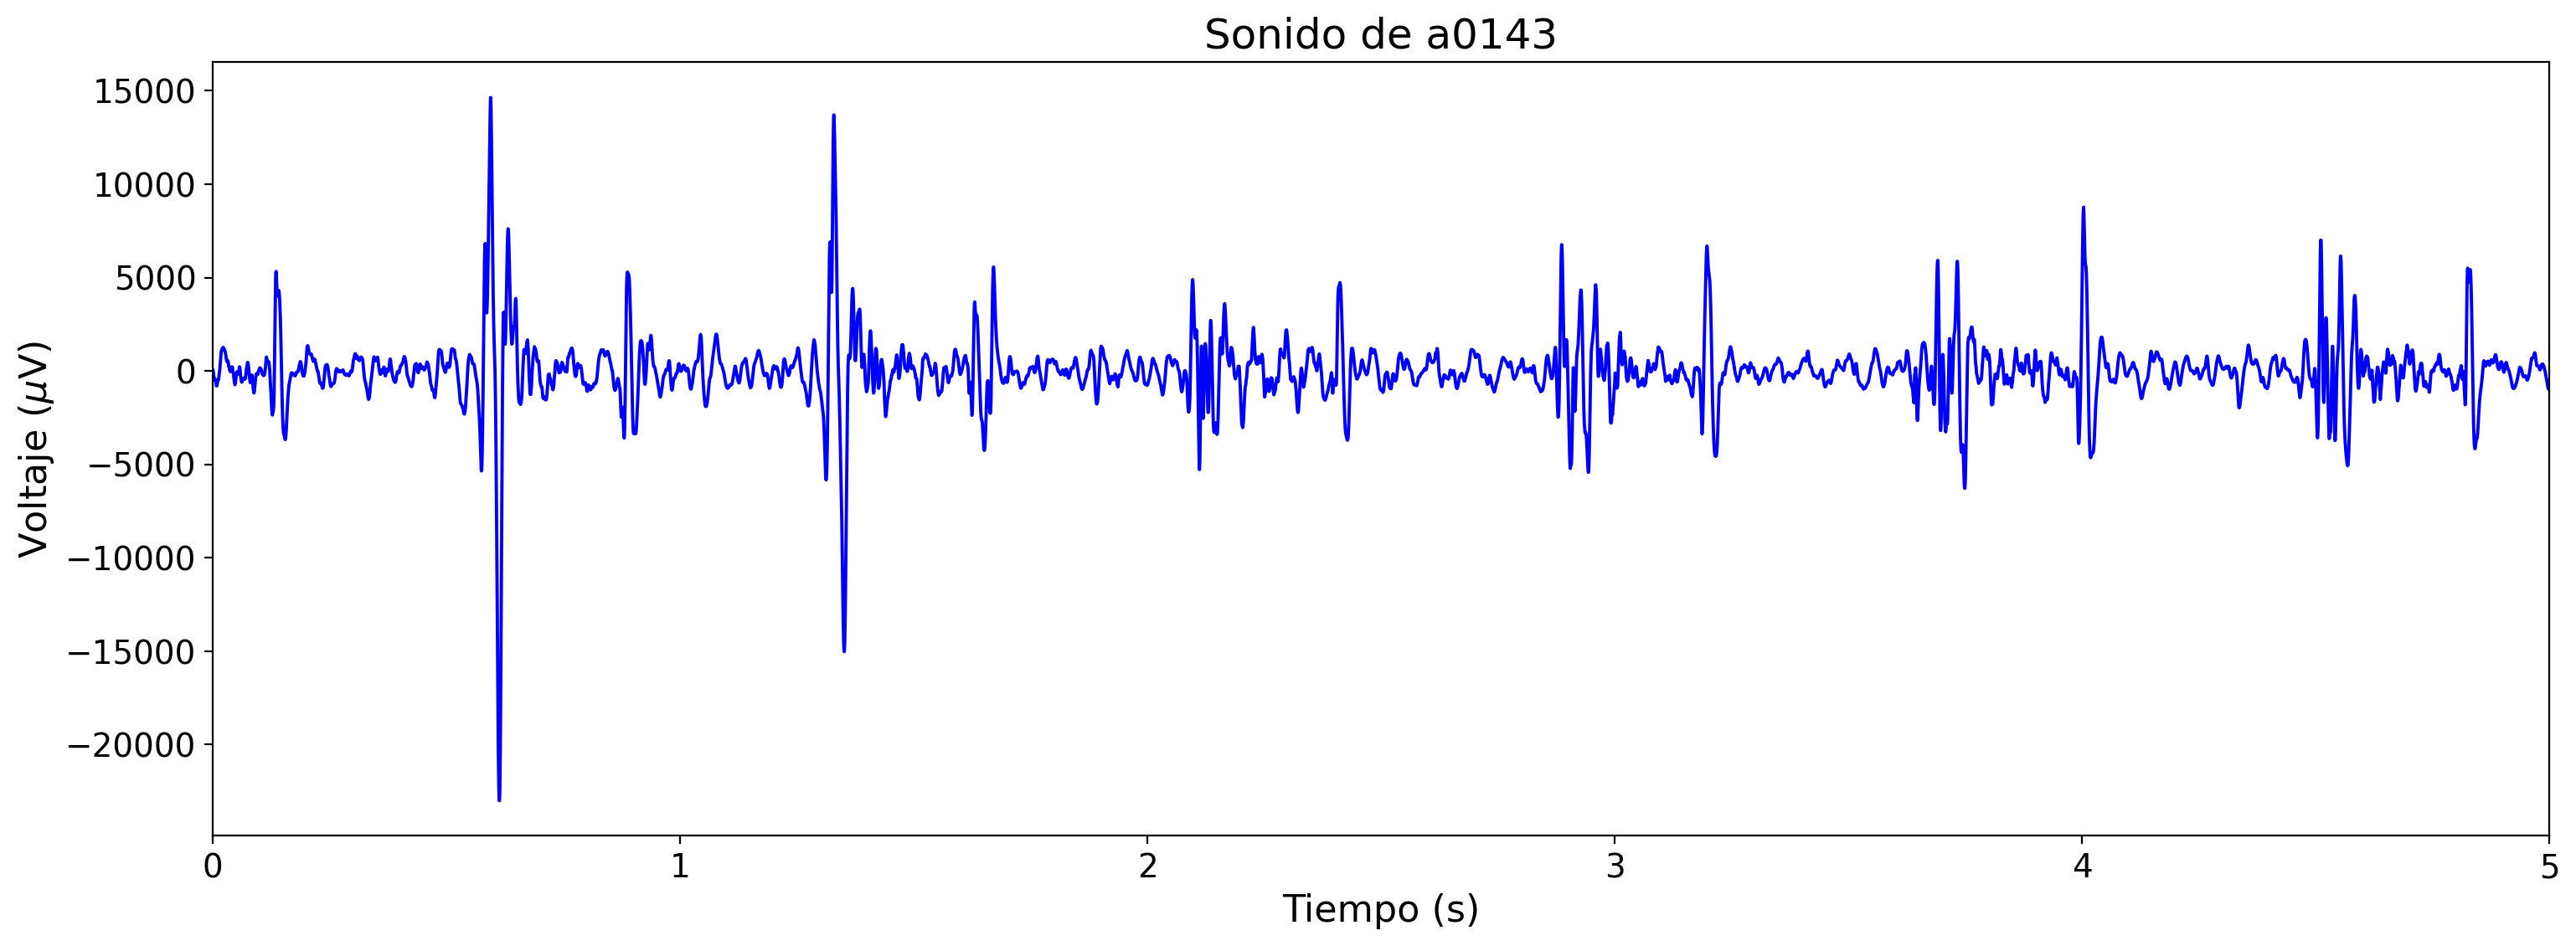

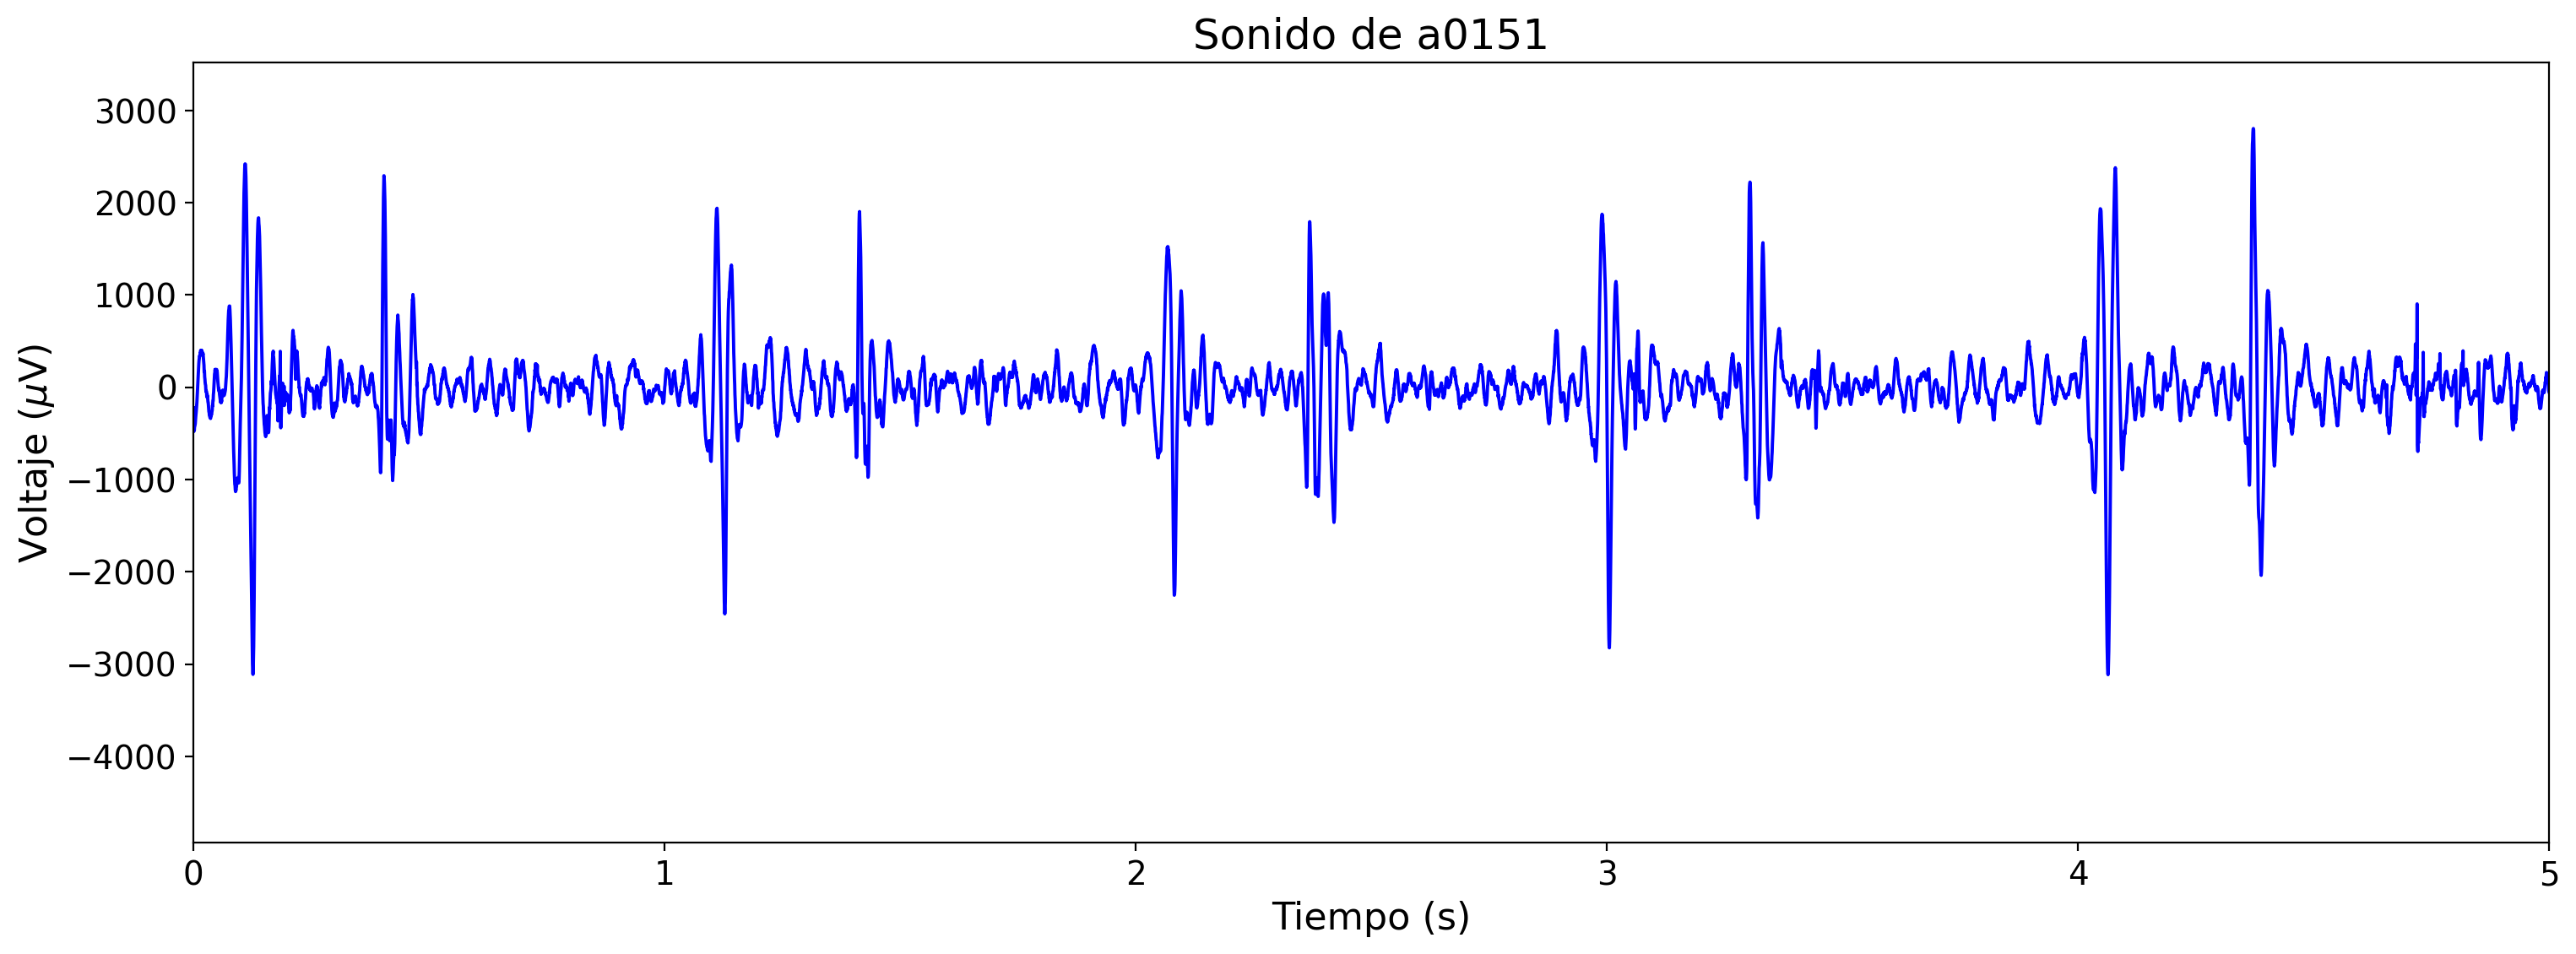

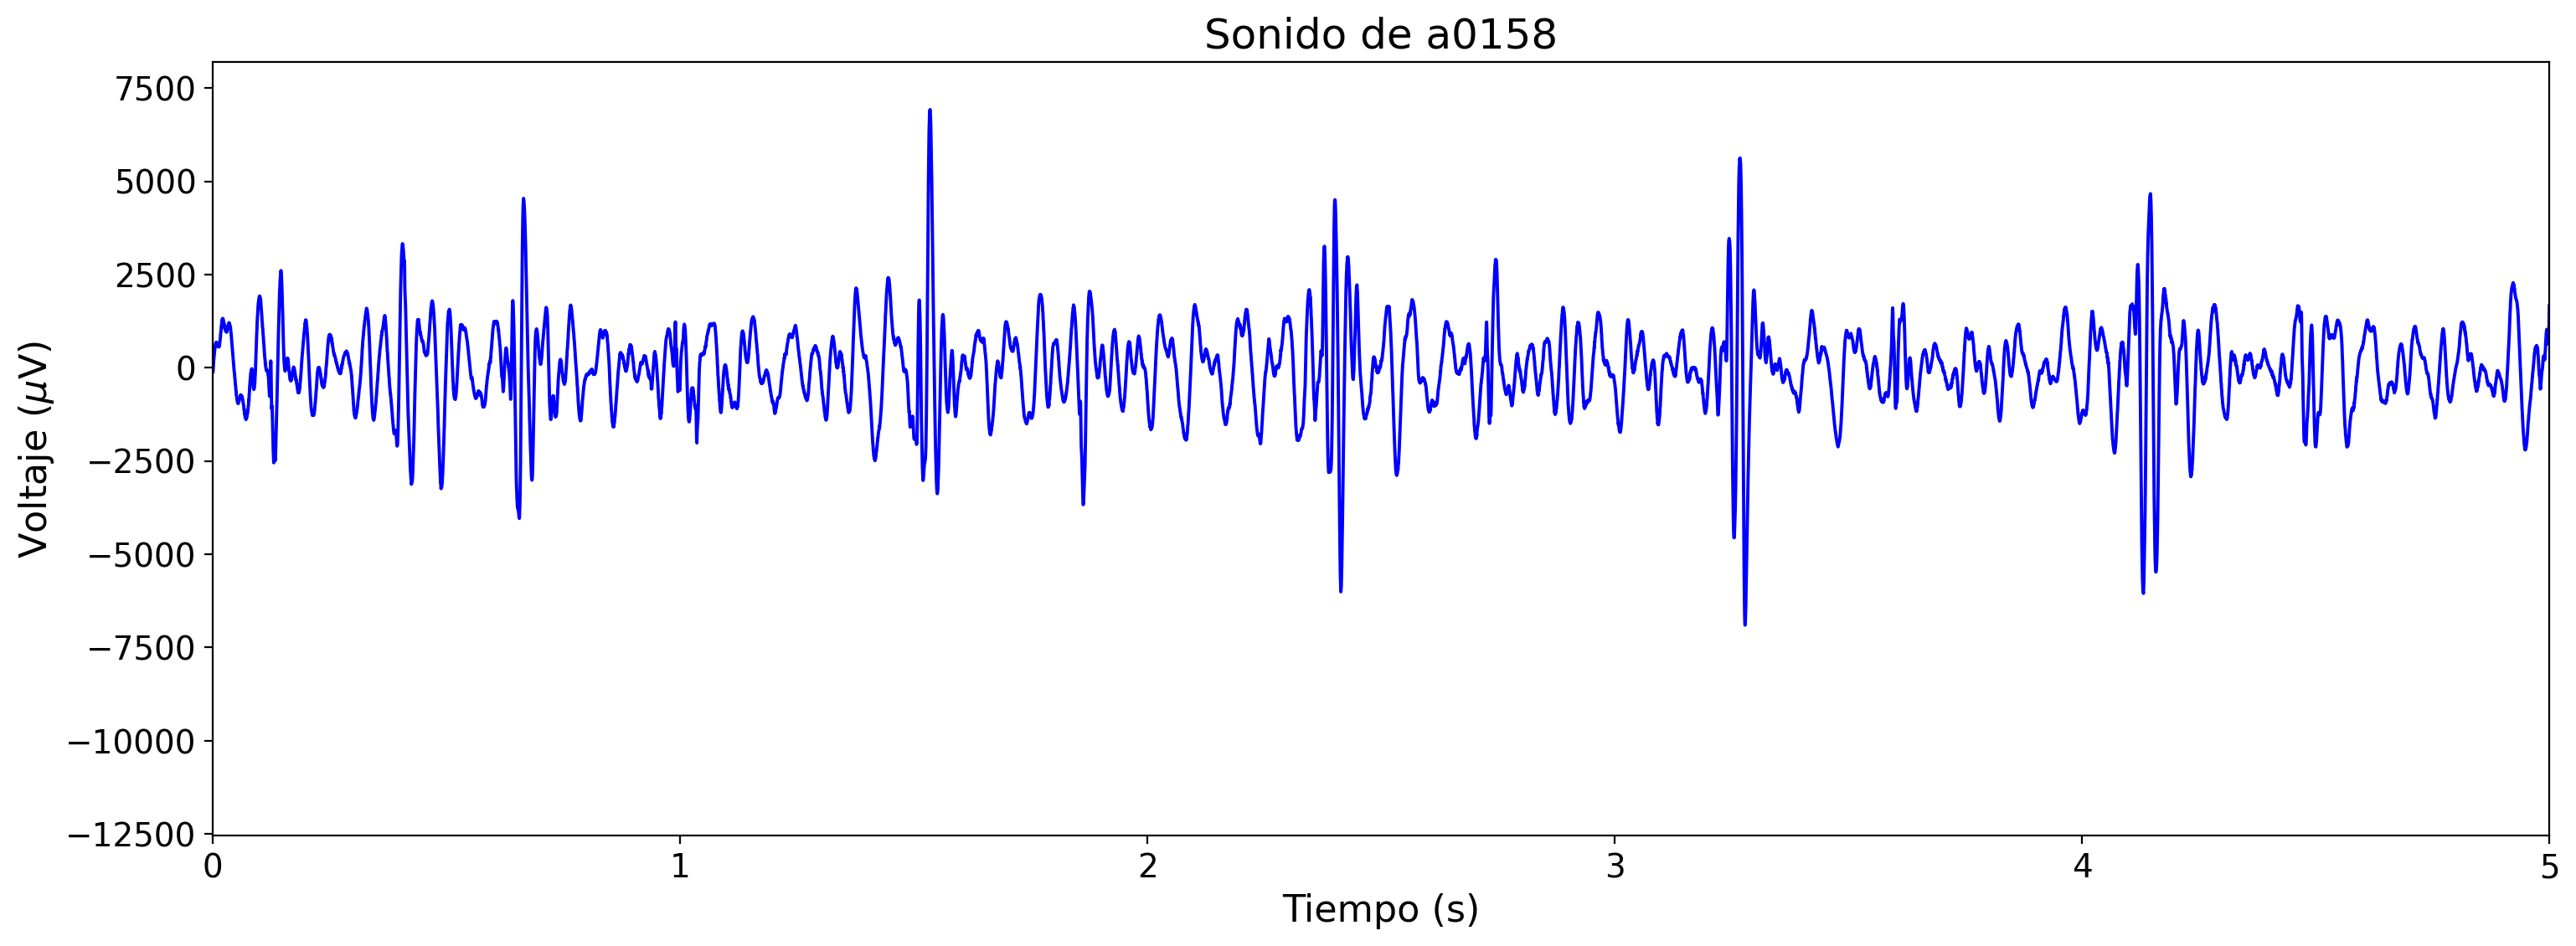

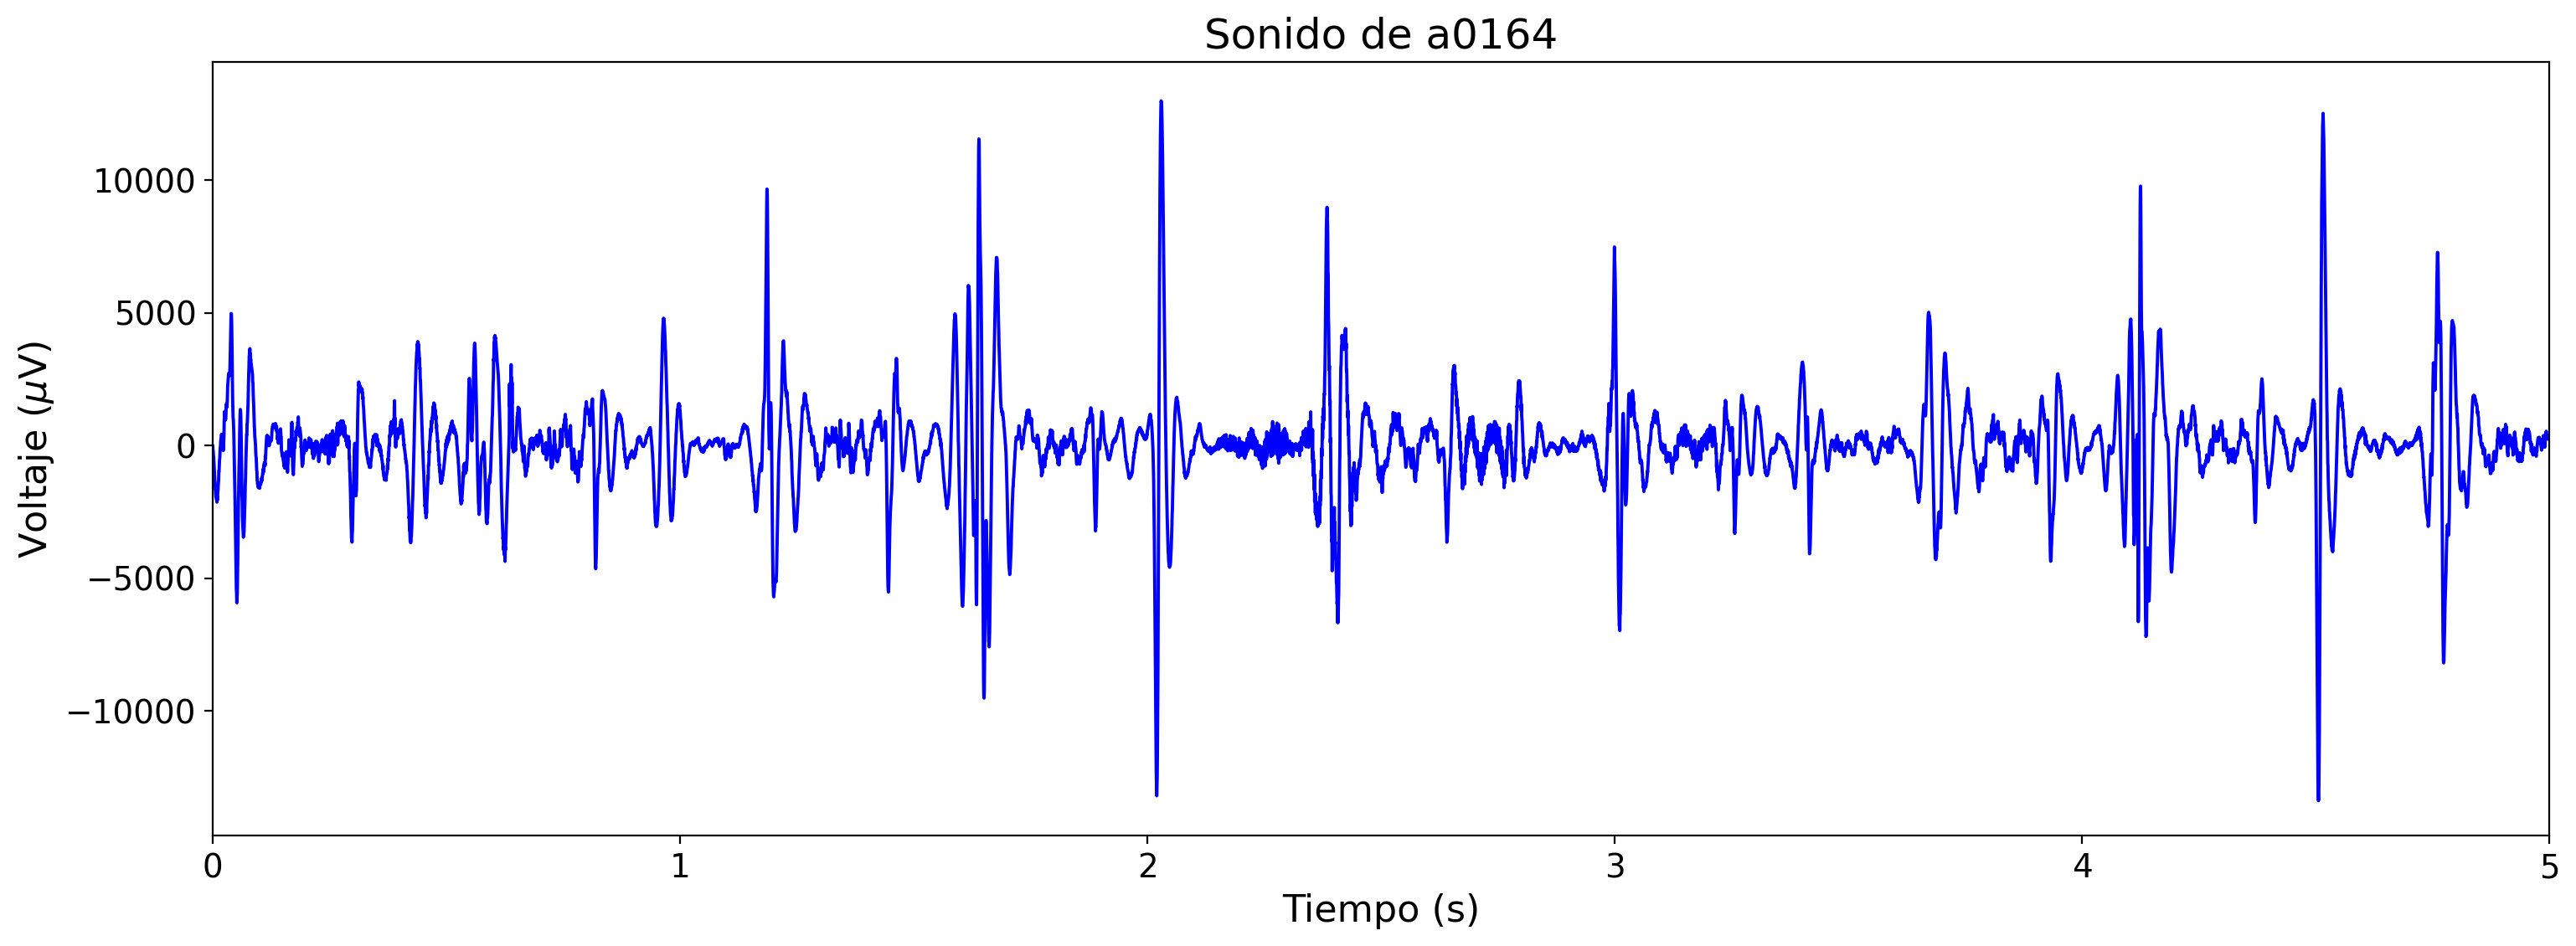

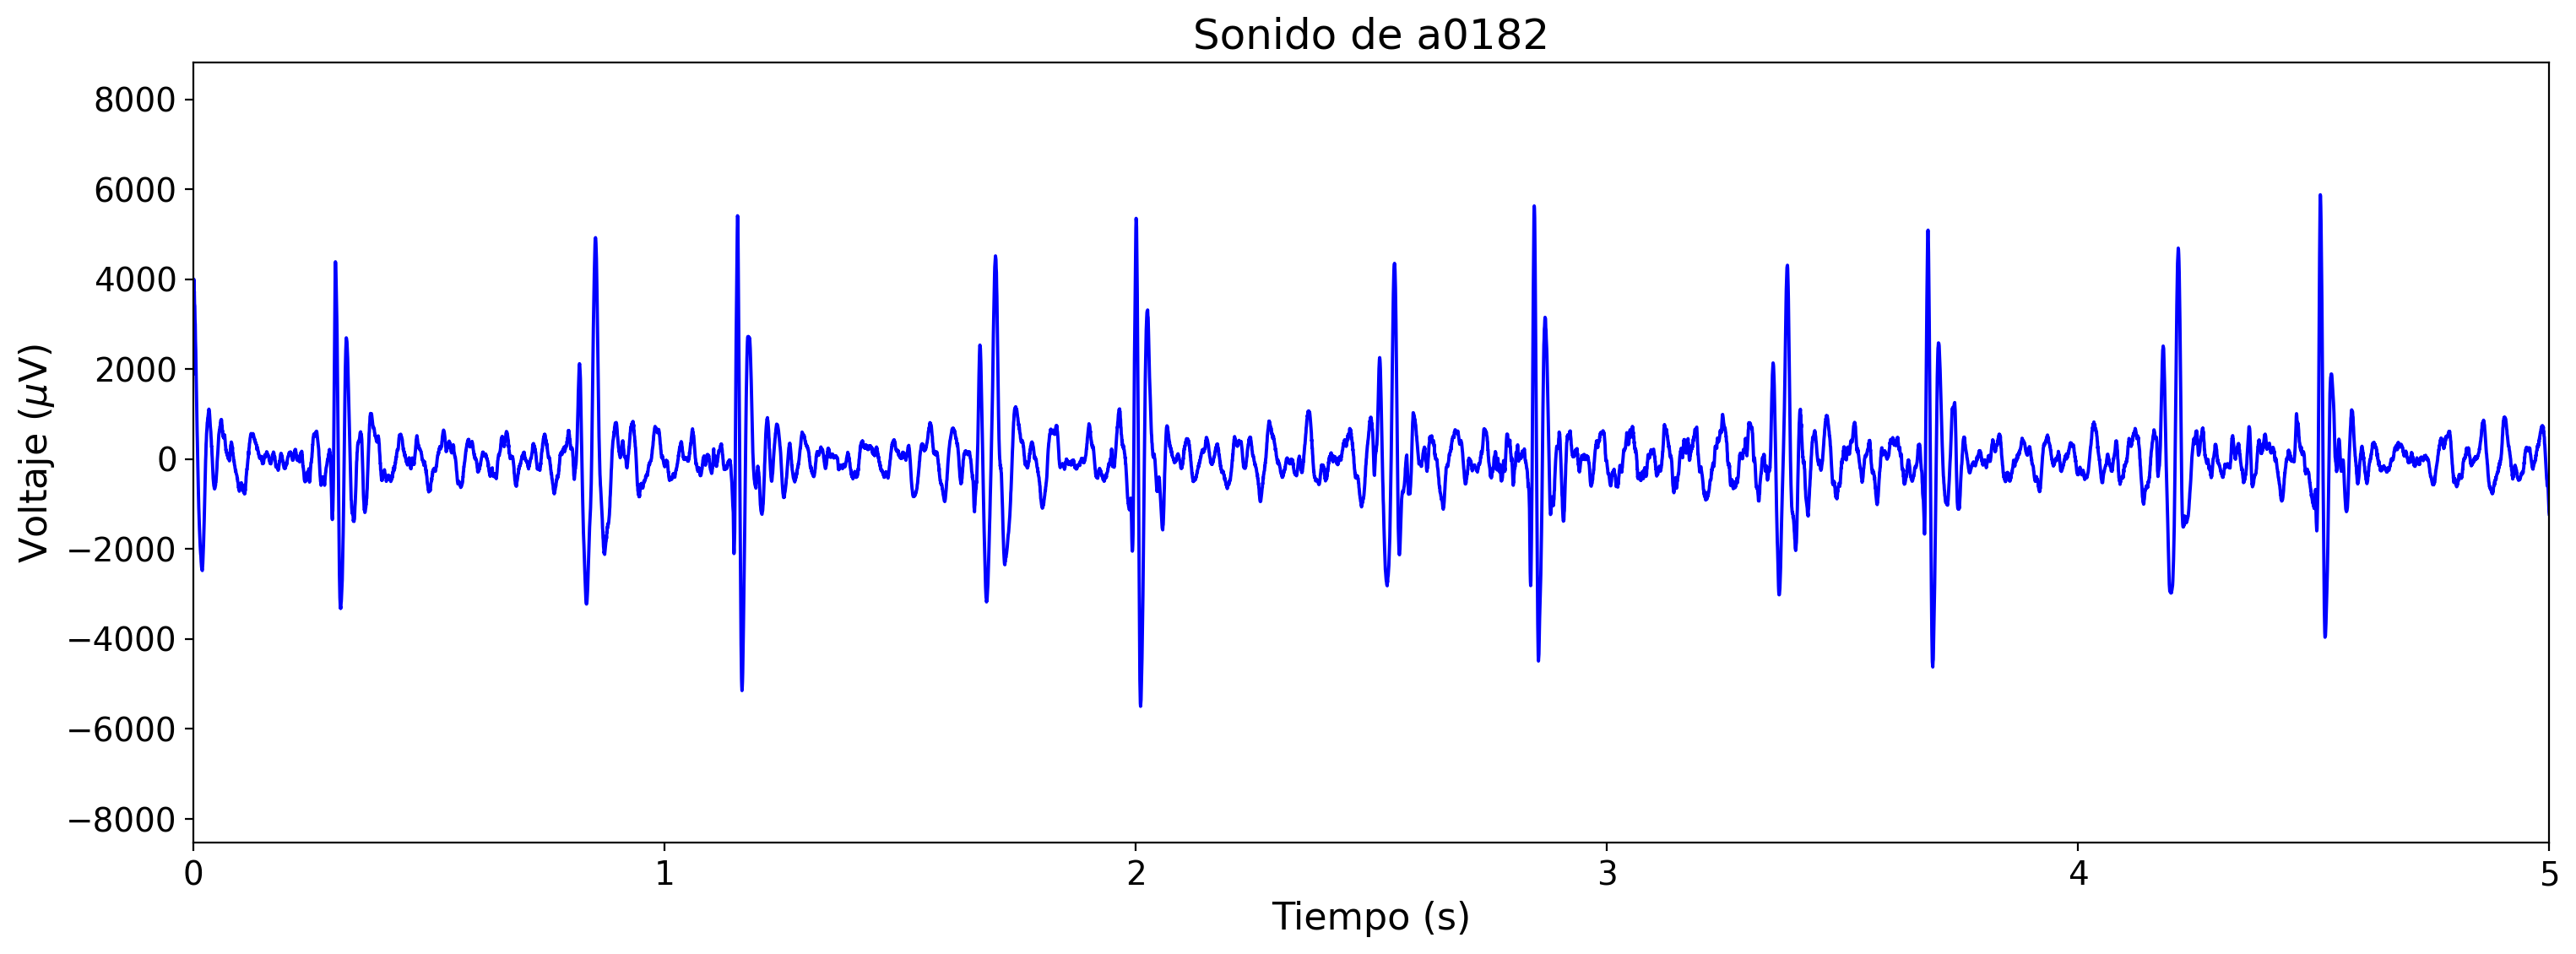

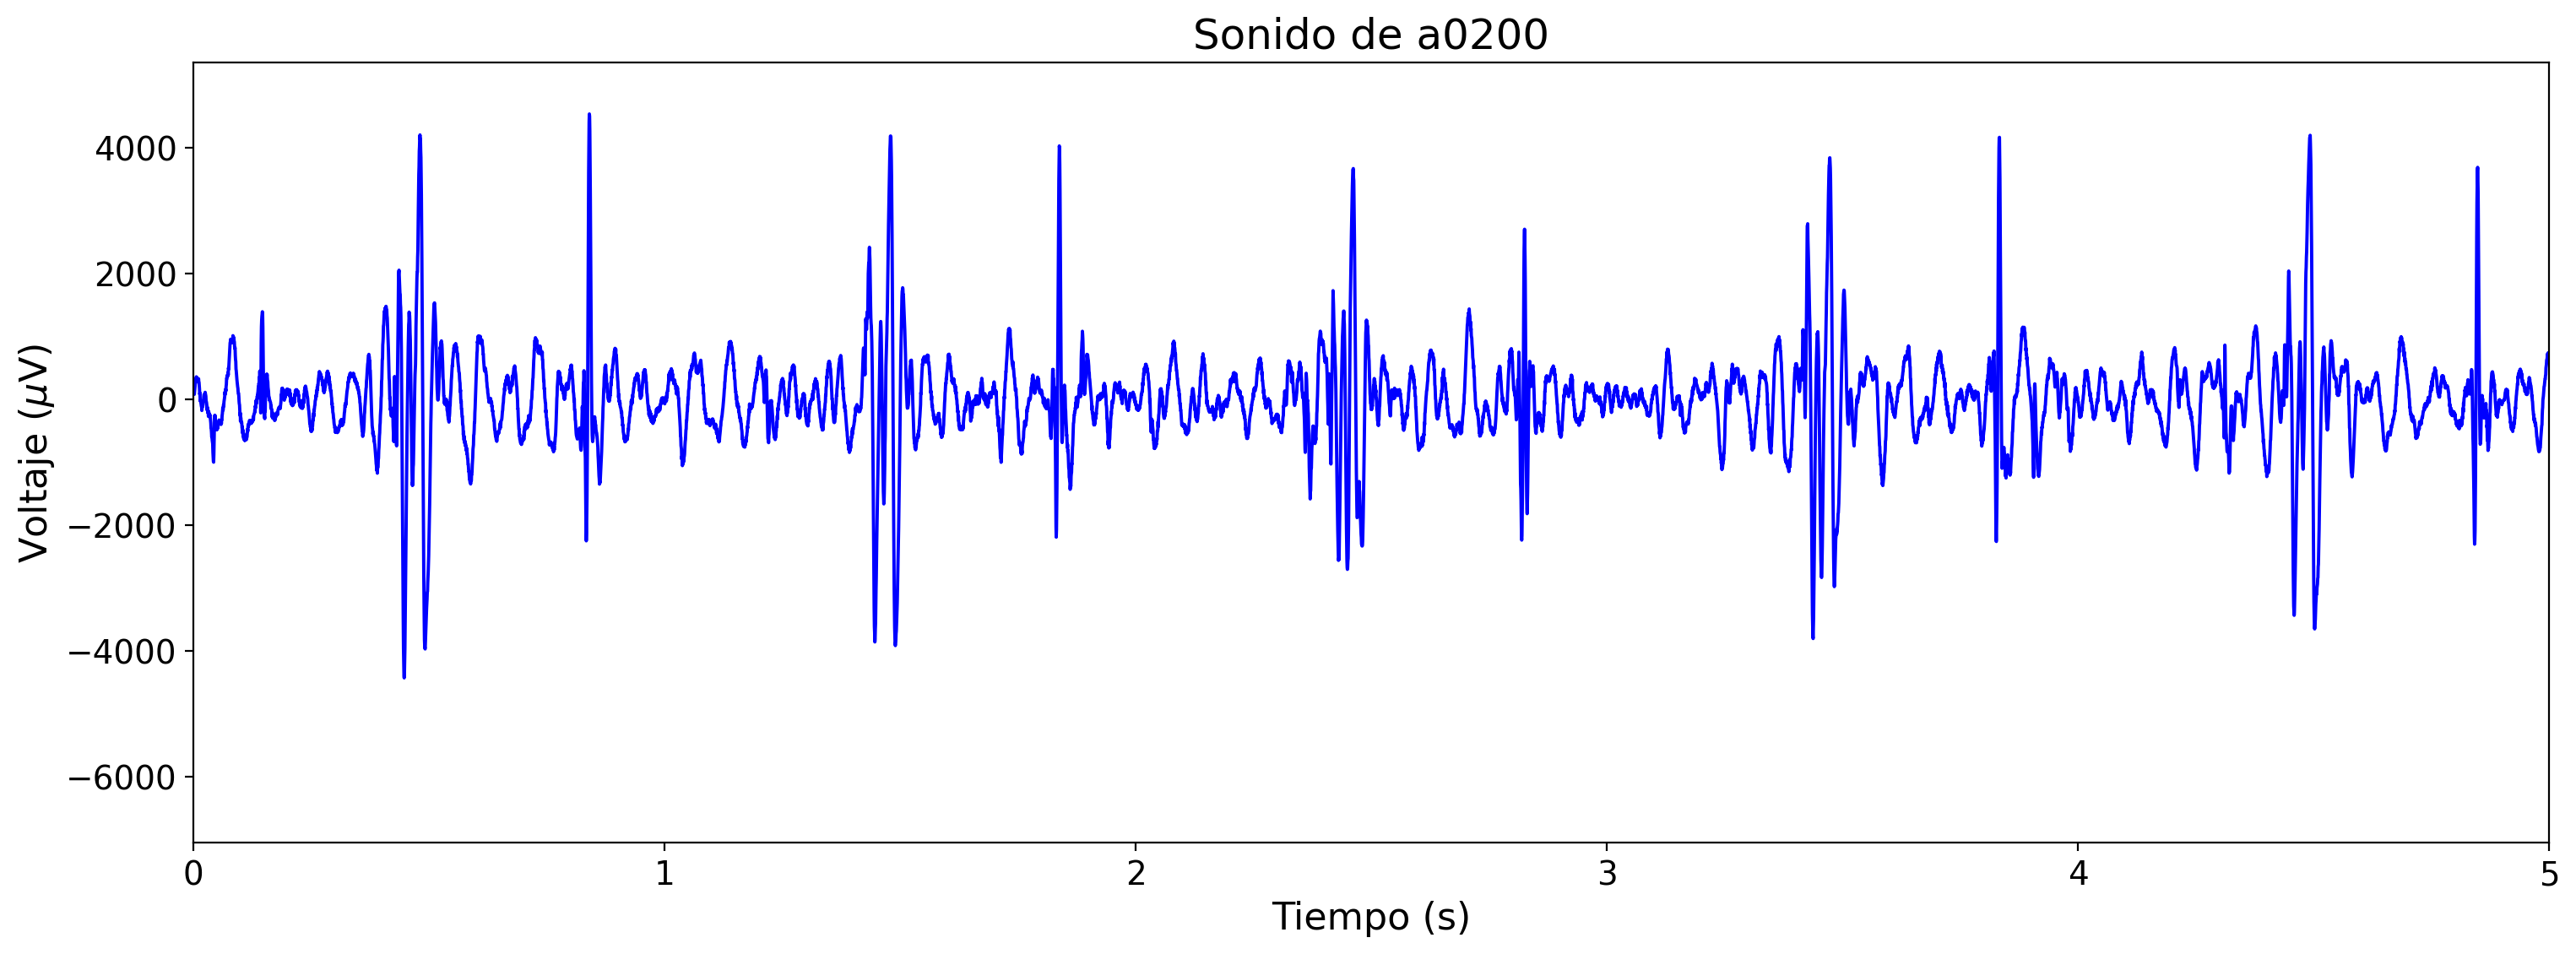

In [4]:
for i in range(0, len(nice)):
    file_path = f"C:\\Users\\User\\Downloads\\ProyectoS\\{nice[i]}.wav" # Dirección de los audios 
    timeECG, waveData = ecg(file_path)
    # Graficación de la ECG señal 
    plt.figure(figsize=(18,6))
    plt.xlabel(r'Tiempo (s)')
    plt.ylabel(r'Voltaje ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.xlim(0,5)
    plt.title(f"Sonido de {nice[i]}")
    plt.show()

* Señal de sonido de 3 latidos 

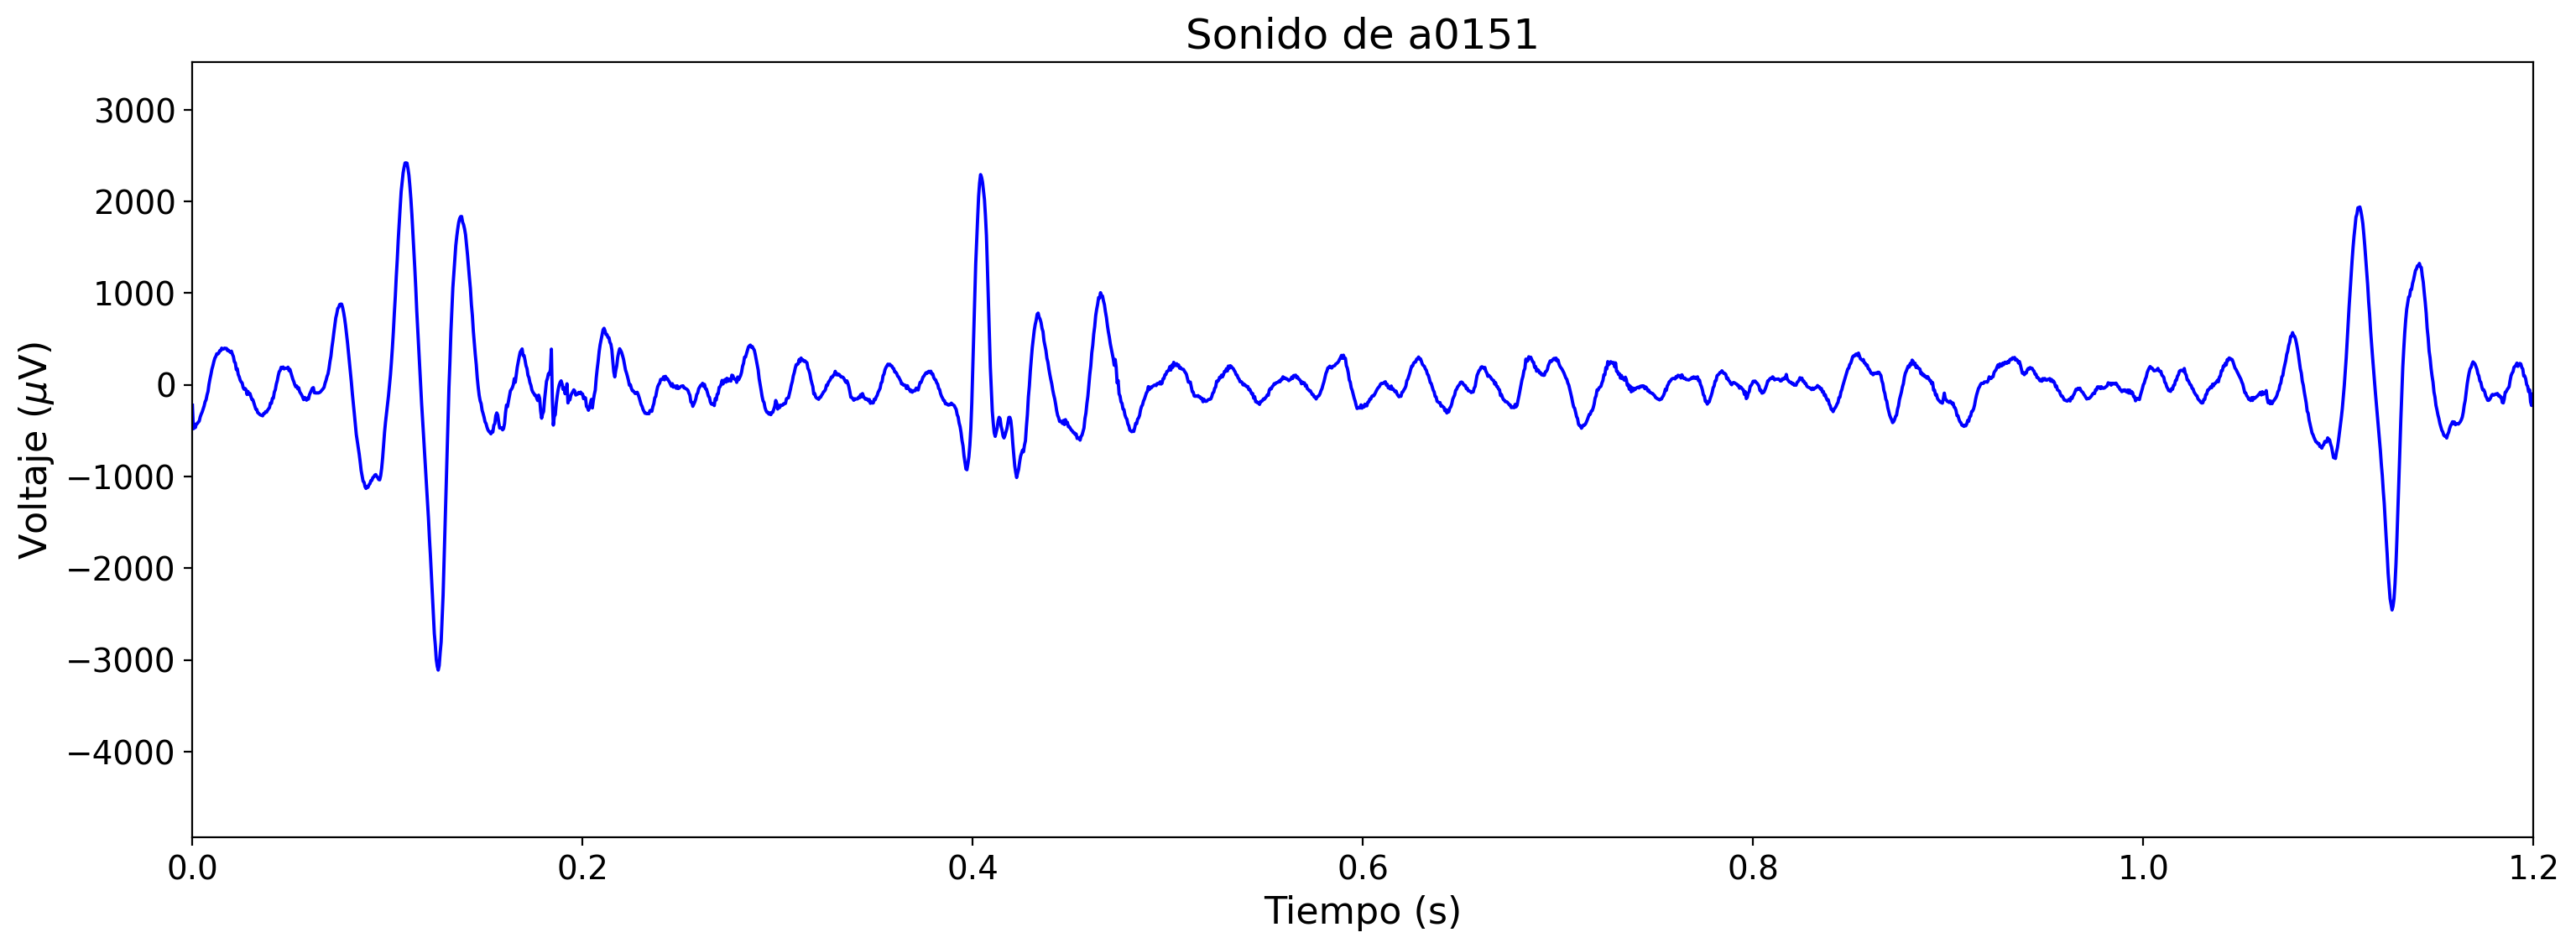

In [5]:
#Cargar y obtener el audio
file_path = f"C:\\Users\\User\\Downloads\\ProyectoS\\a0151.wav"
timeECG, waveData = ecg(file_path)

# Graficar la señal de ECG 
plt.figure(figsize=(18,6))
plt.xlabel(r'Tiempo (s)')
plt.ylabel(r'Voltaje ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(0,1.2) # Tiempo de muestreo modificado 
plt.title("Sonido de a0151")
plt.show()

* Señal de sonido de un latido

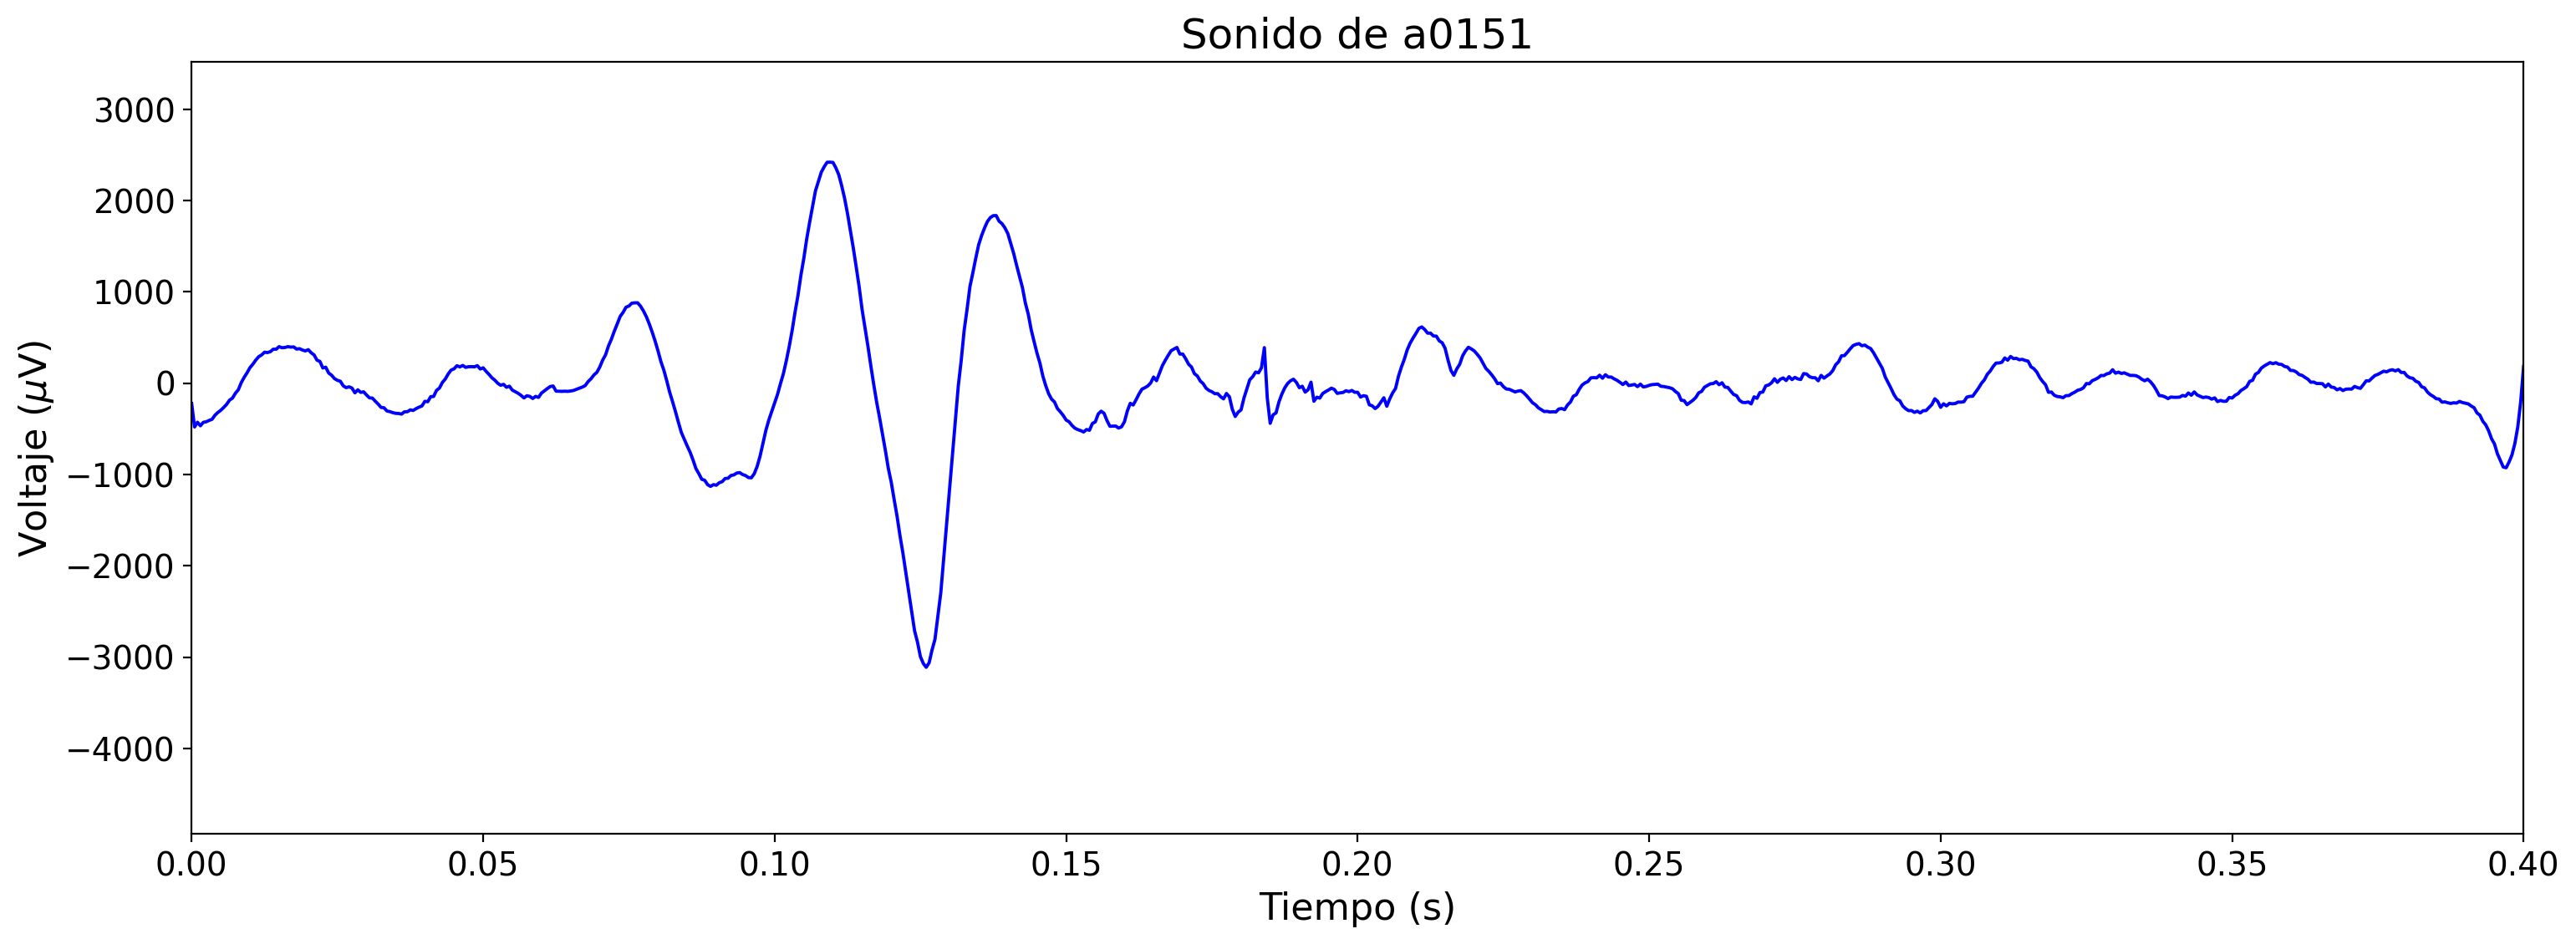

In [6]:
# Cargar el audio
file_path = f"C:\\Users\\User\\Downloads\\ProyectoS\\a0151.wav"
timeECG, waveData = ecg(file_path)

# Graficar la señal de ECG 
plt.figure(figsize=(18,6))
plt.xlabel(r'Tiempo (s)')
plt.ylabel(r'Voltaje ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(0,0.4) # Tiempo modificado 
plt.title("Sonido de a0151")
plt.show()

# Etapa 2 
En este caso, vamos a obtener los puntos máximos de los latidos del corazón para calcular por medio de ellos su frecuencia. En una persona adulta en reposo normal la frecuencia oscila se encuentra entre los 50 y 100 latidos por minuto (Valle Muñoz, s. f.), basados en este rango vamos a modificar el umbral medido para alcanzar la mayor cantidad de picos R o puntos máximos del latido consiguiendo las frecuencias cardíacas de las 15 señales graficadas anteriormente. 

En este caso vamos a mostrar solo las gráficas de los máximos locales de la señal a0151 siendo esta la señal que hemos venido estudiando anteriormente. 

In [12]:
def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.75):
    # Si no se detectan todos los picos R, disminuya el threshold_radio
    # Si los componentes detectados no son los picos R (como la onda T), aumente el threshold_ratio 

    if len(timeECG) != len(waveData): # Genera un error si dos matrices tienen longitudes diferentes
        raise Exception("The two arrays have different lengths.")
    
    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False
    
    for i in range(0, len(waveData)):
            
        if waveData[i] >= threshold:# Si el valor de threshold es sobrepasado,
            # Los indices y valores son guardados
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])
            
        elif banner == True and waveData[i] < threshold: #Si el valor de threshold es atravesado
            # La lista del máximo valor en la matriz original es guardada
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False     

    return mxs_indices

* Puntos máximos de la señal de audio escogida

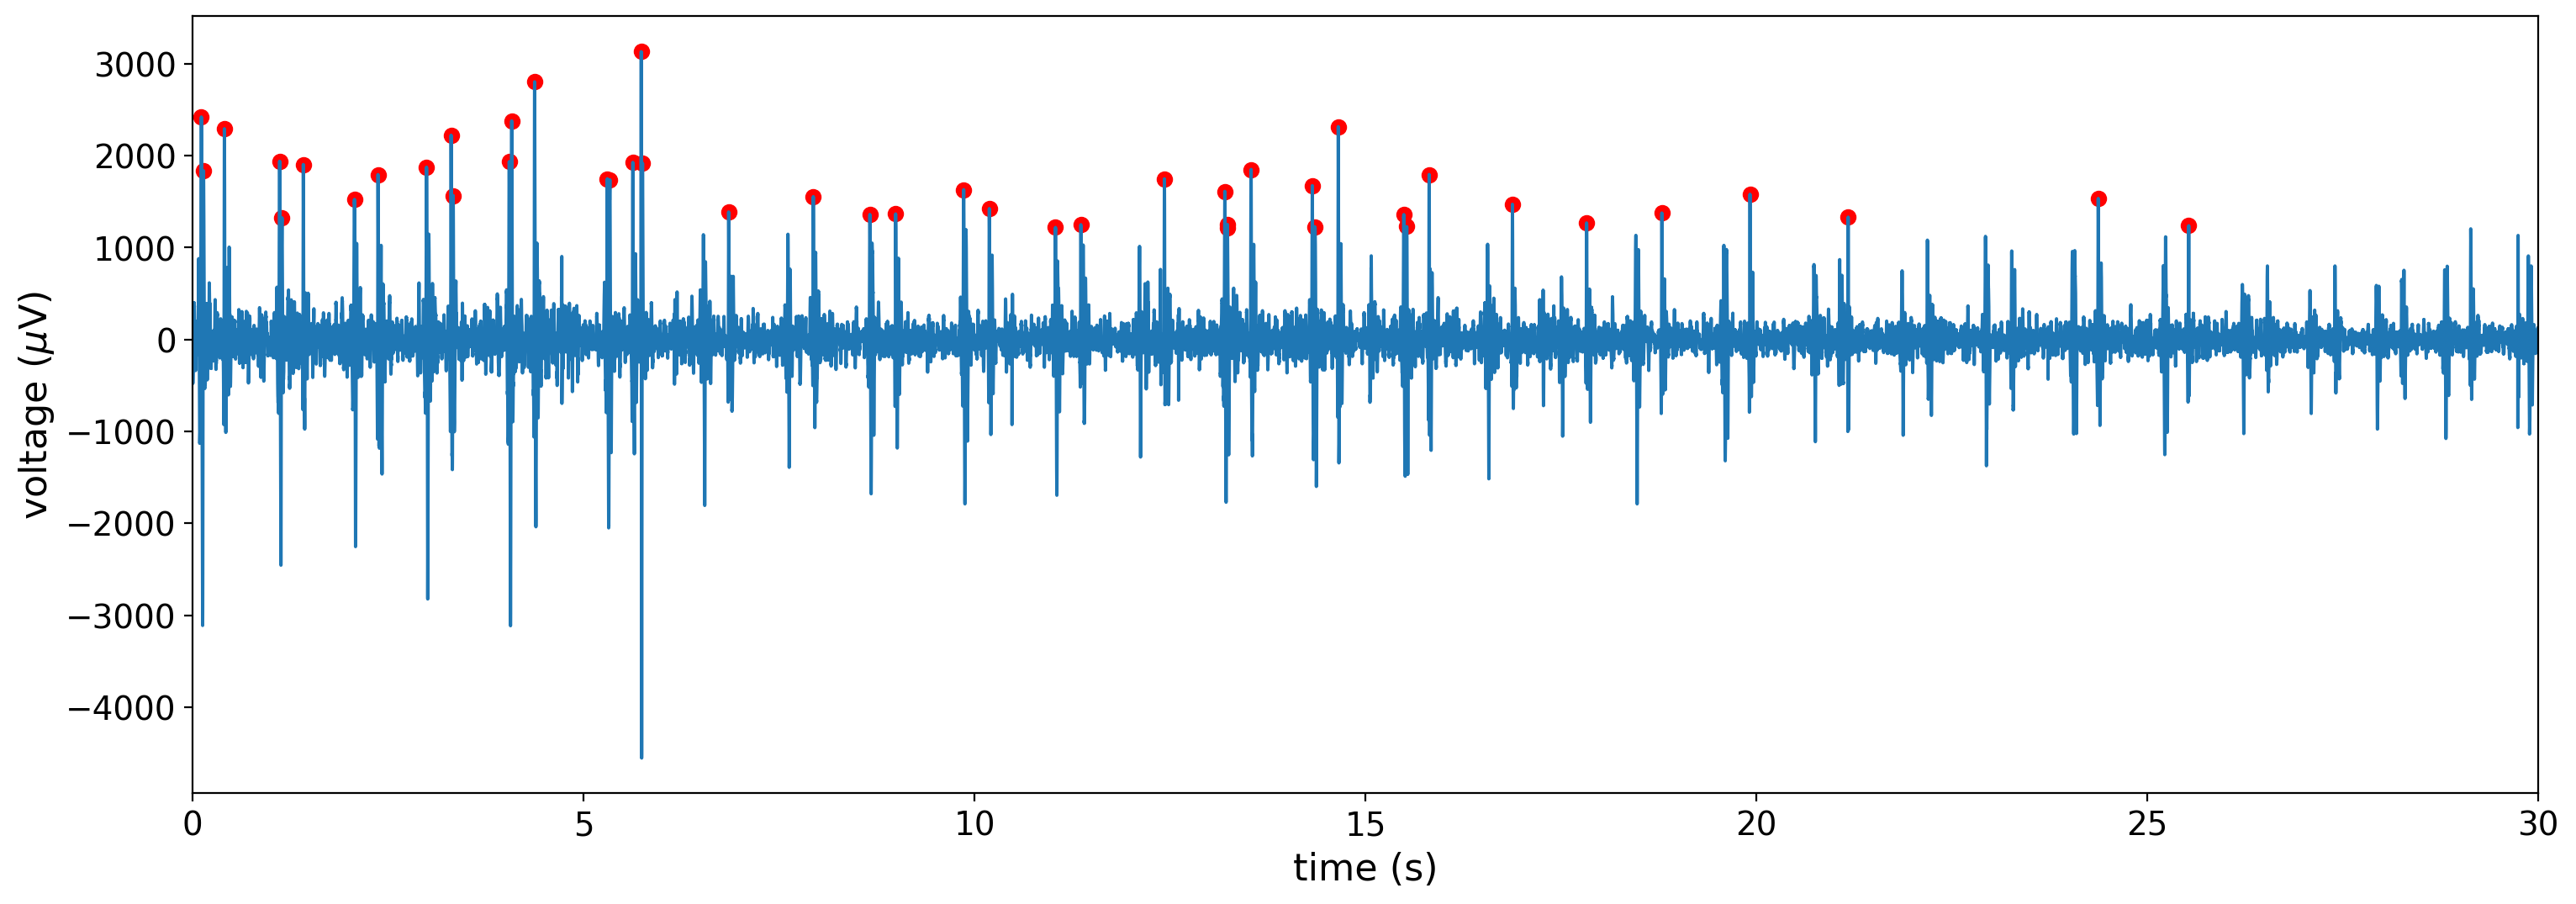

In [18]:
# Gráfica de los puntos máximos 
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(0,30)
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()

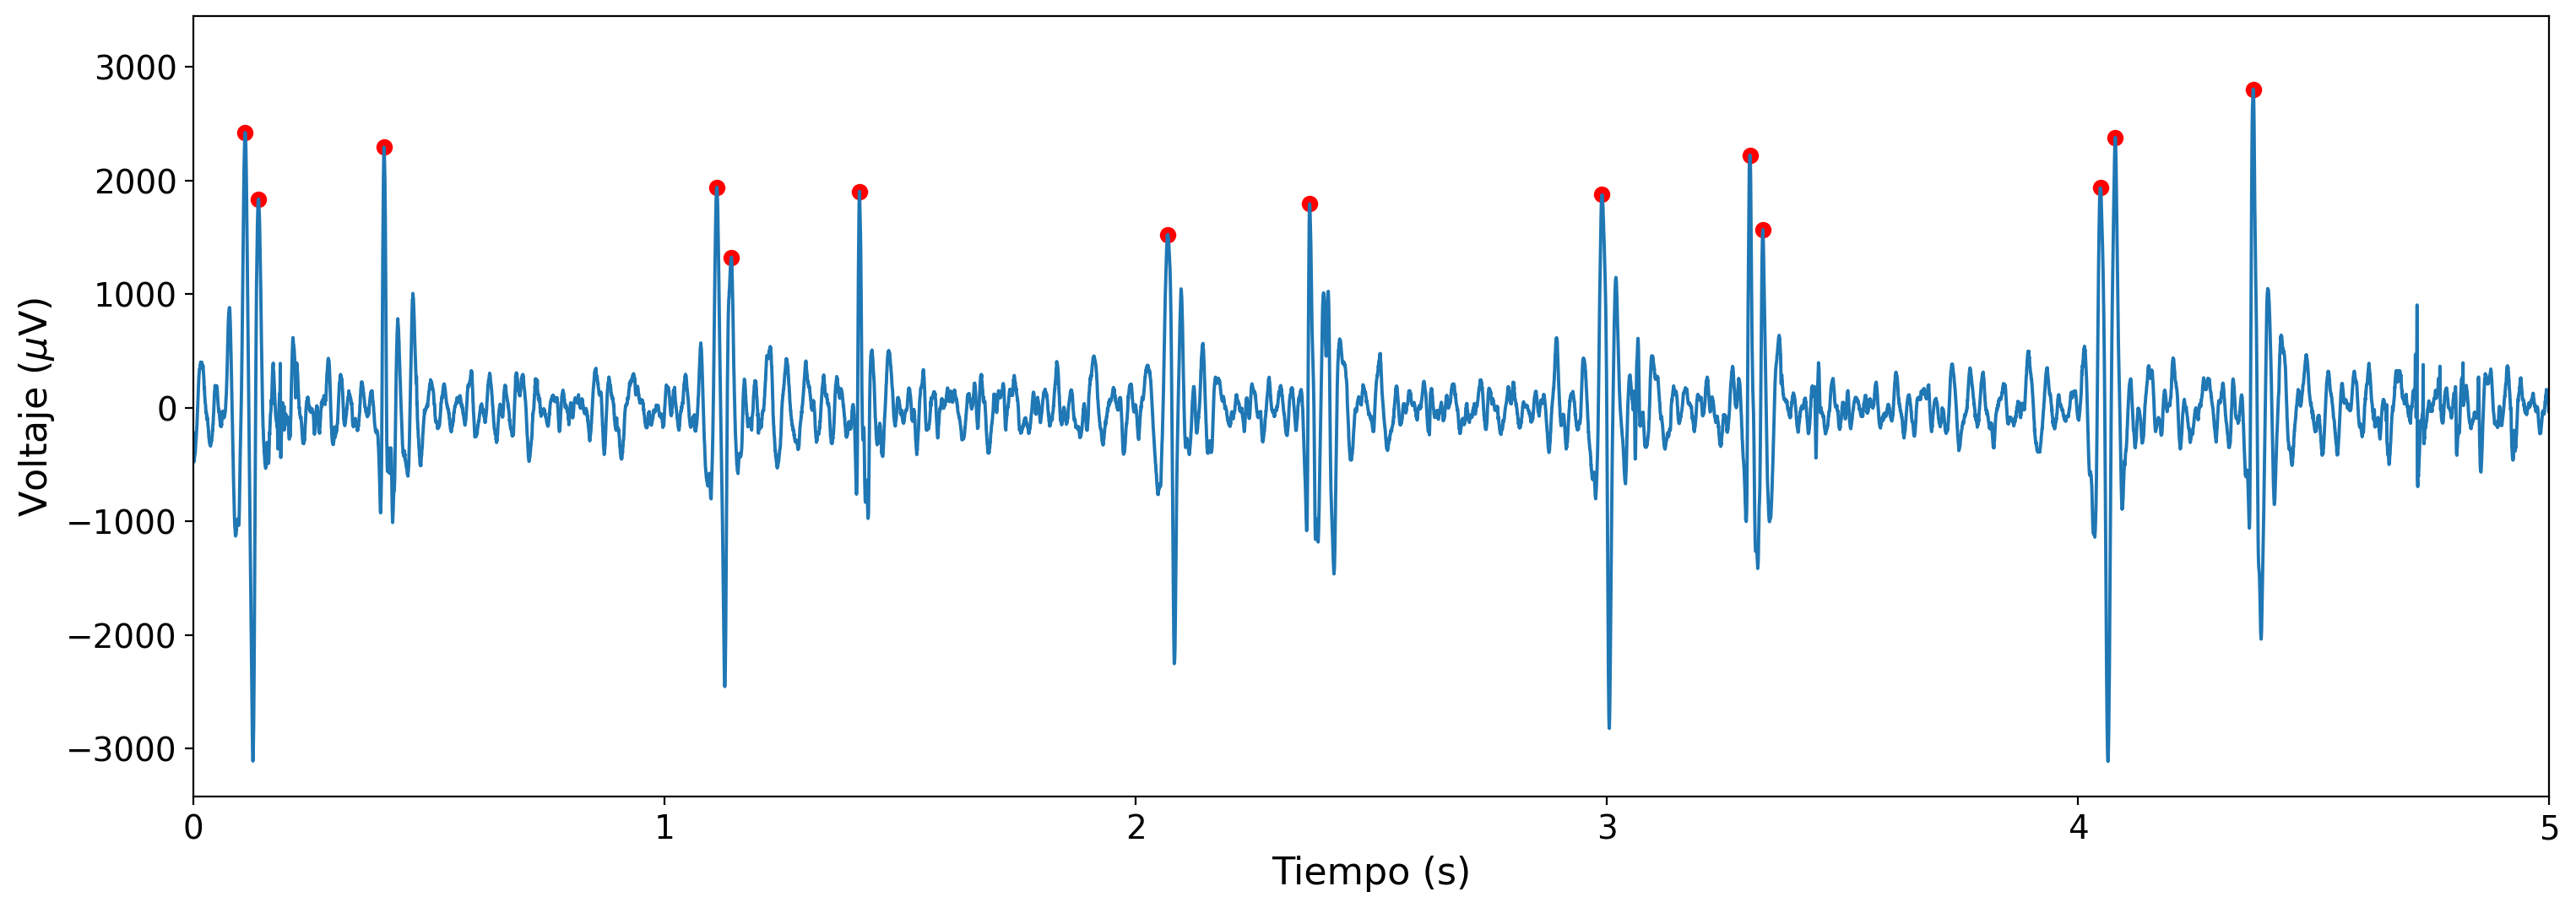

In [17]:
# Señal detallada de principio a fin
init_sec = 0 # Tiempo inicial 
end_sec = 1 # Tiempo final de muestreo deseado
plt.figure(figsize=(18,6))
plt.xlabel(r'Tiempo (s)')
plt.ylabel(r'Voltaje ($\mu$V)')
plt.xlim(timeECG[init_sec*10000],timeECG[end_sec*10000])
plt.plot(timeECG[init_sec*10000:end_sec*10000], waveData[init_sec*10000:end_sec*10000])
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()

En este caso se puede ver que el valor más bajo fue de 0.75, pero no se logran obtener todos los picos R e incluso en algunos latidos se toma la onda T (Zavala-Villeda, 2017) lo cual provoca que el cálculo de la frecuencia cardíaca no sea preciso y tenga fuentes de error, a pesar de modificar el valor menor en búsqueda de la obtención de todos los picos R. 

* Valores máximos de la señal

In [15]:
# Obtención de los puntos más altos de los latidos
mxs_indices = detecta_maximos_locales(timeECG, waveData)

* Frecuencia cardíaca de la señal

In [16]:
# Cálculo de la frecuencia de los latidos 
mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Latidos por minuto:", mean_bpm)

Latidos por minuto: 75.85015380725633


A continuación se presentan las frecuencias de las 15 señales calculadas con el código anterior.

| Señal de sonido | Valor más bajo | Latidos por minuto |
|:----: | :--- | ----:|
| a0001 | 0.7 | 60 |
| a0003 | 0.7 | 4 |
| a0010 | 0.75 | 5 | 
| a0013 | 0.35 | 84 |
| a0024 | 0.25 | 73 |
| a0049 | 0.25 | 97 |
| a0086 | 0.85 | 58 |
| a0104 | 0 | 0 |
| a0128 | 0.8 | 74 |
| a0143 | 0 | 0 |
| a0151 | 0.75 | 76 |
| a0164 | 0.15 | 15 |
| a0182 | 0.25 | 72 |
| a0200 | 0.25 | 80 | 

## Conclusiones 
Por medio de este código se analizaron las señales de sonido de 15 electrocardiogramas la cuales fueron graficadas, de estas se logró ver una con mayor detalle siendo esta del audio a0151 en la que graficó en menores tiempos para ver cada latido con mayor precisión y a partir de ahí se calcularon sus valores máximos los cuales fueron usados para estimar la frecuencias. El cálculo de las frecuencias se realizó con las 15 señales, estas vistas en el cuadro anterior. Esta estimación no fue del todo precisa y se presentaron errores, debido a que no se lograron tomar todos los valores máximos de las señales, esto se debe a que la señal presenta ruido y el mismo interfiere con la onda R siendo la necesaria para determinar los valores de las frecuencias. 
Es por esto que en algunos electrocardiogramas se ven distorcionadas las gráficas y las frecuencias resultantes no fueron las esperadas según el rango mencionado anteriormente, esto implica que si se desean analizar electrocardiogramas por medio del sonido de los latidos del corazón se requiere de filtros que eliminen todo el ruido posible presente en la señal para obtener una frecuencias más precisa, logrando ser utiliza en la industria médica y aportando en la salud de los pacientes.

## Bibliografía
Valle Muñoz, A. (s. f.). Frecuencia cardiaca. Fundación Española del Corazón. https://fundaciondelcorazon.com/prevencion/marcadores-de-riesgo/frecuencia-cardiaca.html

Zavala-Villeda, J. A. (2017). Descripción del electrocardiograma normal y lectura del electrocardiograma. Revista mexicana de anestesiología, 40(S1), 210-213.